**Based on the data on visits to the Yandex.Afisha website. You need to analyze how people use the product, when they start buying, how much money each customer brings in, when it pays off. To reduce costs, provide a list of recommendations for optimizing the marketing costs in Yandex.**



### Data description

**Table `visits` (server log with information about site visits):**
- *Uid* - unique user identifier
- *Device* - user device category
- *Start Ts* - session start date and time
- *End Ts* - session end date and time
- *Source Id* - identifier of the advertising source the user came from

**Table `orders` (information about orders):**
- *Uid* - unique id of the user who placed the order
- *Buy Ts* - order date and time
- *Revenue* - Yandex.Afisha revenue from this order

**Table `costs` (information about marketing costs):**
- *source_id* - identifier of the advertising source
- *dt* - date
- *costs* - expenses for this advertising source on this day

### Links to key actions <a id="cell128"></a>
1. [Heat map](#cell1)
2. [Select specific columns from the table without sorting ](#cell2)
3. [Convert time to whole minutes and convert time to integers](#cell3)
3. [Schedule with dates](#cell4)

In [1]:
import pandas as pd
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from pymystem3 import Mystem
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import os
#qfrom pandas_profiling import ProfileReport 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


## Step 1. Load the data and prepare it for analysis
Load visit, order and expense data into the variables. Optimize the data for analysis. Make sure that the data type in each column is correct. 

In [2]:
visit = pd.read_csv('C:\\Users\\User\\Downloads\\visits_log.csv')
order = pd.read_csv('C:\\Users\\User\\Downloads\\orders_log.csv')
cost = pd.read_csv('C:\\Users\\User\\Downloads\\costs.csv')


In [3]:
display(visit.head())
display(visit.tail())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,Device,End Ts,Source Id,Start Ts,Uid
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559


In [4]:
display(order.head())
display(order.tail())

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,Buy Ts,Revenue,Uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


In [5]:
display(cost.head())
display(cost.tail())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


,source_id,dt,costs
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


**Check the data structure of the table**

In [6]:
def total_info(df, name_list):
    print('Table column name', name_list)
    print('___________________________________________')
    display(df.columns) # column names
    print('___________________________________________')
    print('Table structure', name_list)
    print('___________________________________________')
    display(df.head())# table structure
    print('___________________________________________')
    print('General Info Info table', name_list)
    print('___________________________________________')
    display(df.info())# table composition, column format, presence of empty rows
    print('___________________________________________')
    print('General information about the table', name_list)
    print('___________________________________________')
    display(df.describe())# are used to view some basic statistics, 
    # such as percentile, mean, standard deviation, etc. Д.
    print('___________________________________________')
    print('Presence of null objects in the table', name_list)
    print('___________________________________________')
    display(df.isnull().sum()) # presence of null objects
    print('___________________________________________')
    print('Presence of gaps in the table' , name_list)
    print('___________________________________________')
    display(df.isna().sum())# presence of gaps
    print('___________________________________________')
    print('Presence of duplicates in the table' , name_list)
    print('___________________________________________')
    display(df.duplicated().sum()) # presence of duplicates

### Table

In [7]:
total_info(visit, 'visit')

Table column name visit
___________________________________________


Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

___________________________________________
Table structure visit
___________________________________________


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


___________________________________________
General Info Info table visit
___________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

___________________________________________
General information about the table visit
___________________________________________


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


___________________________________________
Presence of null objects in the table visit
___________________________________________


Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

___________________________________________
Presence of gaps in the table visit
___________________________________________


Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

___________________________________________
Presence of duplicates in the table visit
___________________________________________


0

# Output from the table
- incorrect column names, spaces, uppercase text
- columns are in a non-temporal format over time

### order table

In [8]:
total_info(order, 'order')

Table column name order
___________________________________________


Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

___________________________________________
Table structure order
___________________________________________


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


___________________________________________
General Info Info table order
___________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

___________________________________________
General information about the table order
___________________________________________


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


___________________________________________
Presence of null objects in the table order
___________________________________________


Buy Ts     0
Revenue    0
Uid        0
dtype: int64

___________________________________________
Presence of gaps in the table order
___________________________________________


Buy Ts     0
Revenue    0
Uid        0
dtype: int64

___________________________________________
Presence of duplicates in the table order
___________________________________________


0

# Output by table order
- incorrect column names, spaces, upper case text
- columns are in a non-temporal format over time

### cost table

In [9]:
total_info(cost, 'cost')

Table column name cost
___________________________________________


Index(['source_id', 'dt', 'costs'], dtype='object')

___________________________________________
Table structure cost
___________________________________________


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


___________________________________________
General Info Info table cost
___________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

___________________________________________
General information about the table cost
___________________________________________


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


___________________________________________
Presence of null objects in the table cost
___________________________________________


source_id    0
dt           0
costs        0
dtype: int64

___________________________________________
Presence of gaps in the table cost
___________________________________________


source_id    0
dt           0
costs        0
dtype: int64

___________________________________________
Presence of duplicates in the table cost
___________________________________________


0

# Output from the cost table
- columns are in a non-temporal format over time

## Reset tables to the correct column names and data format

**Columns: change the name**

In [10]:
visit = visit.rename(columns={'Device':'device', 'End Ts':'end_ts', 'Source Id':'source_id', 'Start Ts':'start_ts', 'Uid':'uid'}) 

In [11]:
order = order.rename(columns={'Buy Ts':'buy_ts', 'Revenue':'revenue', 'Uid':'uid'})

In [12]:
cost = cost.rename(columns={'dt':'data'})

In [13]:
display(visit.head())
display(order.head())
display(cost.head())

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,source_id,data,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


**Columns: to the correct type of data datatime**

In [14]:
visit['end_ts'] = pd.to_datetime(visit['end_ts'])
visit['start_ts'] = pd.to_datetime(visit['start_ts'])
visit.dtypes

device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object

In [15]:
order['buy_ts'] = pd.to_datetime(order['buy_ts'])
order.dtypes

buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object

In [16]:
cost['data'] = pd.to_datetime(cost['data'])
cost.dtypes

source_id             int64
data         datetime64[ns]
costs               float64
dtype: object

In [17]:
display(visit.head())
display(order.head())
display(order.tail())
display(cost.head())

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,buy_ts,revenue,uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


,source_id,data,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


## Overall output from step 1: 

### - recommend technical department to adjust header output and data format when generating reports

# Step 2.  let's build the reports and calculate the metrics 
## Product

## How many people use per day, week, month?
- **DAU** (from English. daily active users) - the number of unique users per day;
- **WAU** (from English. weekly active users) - number of unique users per week;
- **MAU** (from Eng. monthly active users) - number of unique users per month.  


**add the columns day , week , month , year to the table order** 

In [18]:
visit['day'] = visit['start_ts'].dt.day
visit['week'] = visit['start_ts'].dt.week
visit['month'] = visit['start_ts'].dt.month
visit['year'] =visit['start_ts'].dt.year
visit.head()

,device,end_ts,source_id,start_ts,uid,day,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,26,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,52,12,2017


## How many people use per day

,day,uid
0,1,9250
1,2,9794
2,3,10070
3,4,10184
4,5,10526
5,6,10651
6,7,10723
7,8,10281
8,9,9962
9,10,9995


,day,uid
count,31.000000,31.000000
mean,16.000000,10241.870968
std,9.092121,968.779911
min,1.000000,6231.000000
25%,8.500000,9993.000000
50%,16.000000,10300.000000
75%,23.500000,10656.500000
max,31.000000,12003.000000


10241.870967741936

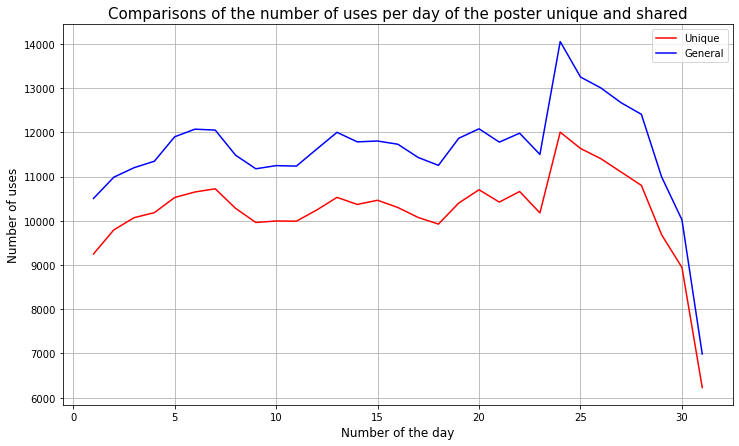

In [19]:
use_afisha_day_unig = visit.groupby('day').agg({'uid':'nunique'}).reset_index()
use_afisha_day_count = visit.groupby('day').agg({'uid':['count']}).reset_index()
display(use_afisha_day_unig)
#display(int(use_afisha_day_unig))
display(use_afisha_day_unig.describe())
use_afisha_day_mean = use_afisha_day_unig['uid'].mean()
display(use_afisha_day_mean)
plt.figure(figsize=(12,7))
plt.plot(use_afisha_day_unig['day'], use_afisha_day_unig['uid'], '-r');
plt.plot(use_afisha_day_count['day'], use_afisha_day_count['uid']['count'], '-b');
plt.title('Comparisons of the number of uses per day of the poster unique and shared', fontsize=15, color='black')
plt.xlabel('Number of the day',fontsize=12, color='black')
plt.ylabel('Number of uses',fontsize=12, color='black')
plt.legend(['Unique', 'General'])
plt.grid(True)
plt.show()

## Conclusion: we see spikes in the use of the poster at the beginning and closer to the end of the month. I think that the surge in the 20's of the month is due to the receipt of wages people are beginning to spend more money on entertainment.

## How many people use per week

,week,uid
,,nunique
0,1,6918
1,2,6703
2,3,6972
3,4,7060
4,5,8111


,week,uid
,,nunique
count,52.000000,52.000000
mean,26.500000,5825.288462
std,15.154757,2004.308969
min,1.000000,2364.000000
25%,13.750000,4128.750000
50%,26.500000,6233.000000
75%,39.250000,7420.750000
max,52.000000,10586.000000


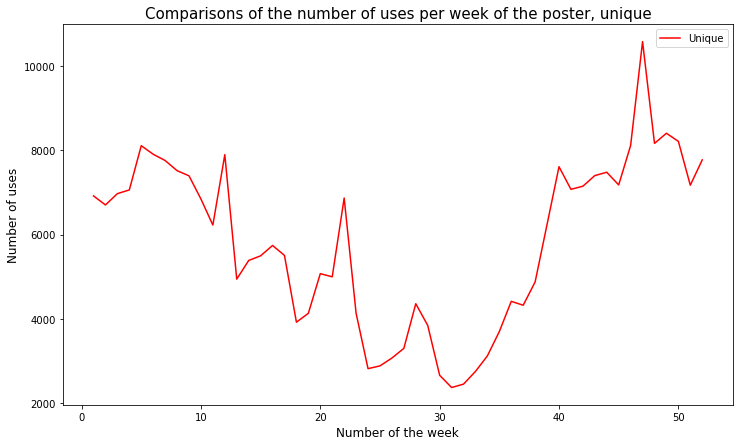

In [20]:
use_afisha_week = visit.groupby('week').agg({'uid':['nunique']}).reset_index()
display(use_afisha_week.head())
display(use_afisha_week.describe())
plt.figure(figsize=(12,7))
plt.plot(use_afisha_week['week'], use_afisha_week['uid']['nunique'], '-r');
#plt.plot(use_afisha_month_count['month'], use_afisha_month_count['uid']['count'], '-b');
plt.title('Comparisons of the number of uses per week of the poster, unique', fontsize=15, color='black')
plt.xlabel('Number of the week',fontsize=12, color='black')
plt.ylabel('Number of uses',fontsize=12, color='black')
plt.legend(['Unique', 'General'])
plt.show()

## Conclusion: see spikes in the use of posters closer to the end of the year. The long New Year's holidays increase people's attendance at events.

## How many people use per month

,month,uid
,,nunique
0,1,28716
1,2,28749
2,3,27473
3,4,21008
4,5,20701
5,6,13259
6,7,14183
7,8,11631
8,9,18975


,month,uid
,,nunique
count,12.000000,12.000000
mean,6.500000,23228.416667
std,3.605551,7546.380462
min,1.000000,11631.000000
25%,3.750000,17777.000000
50%,6.500000,24240.500000
75%,9.250000,28984.750000
max,12.000000,32797.000000


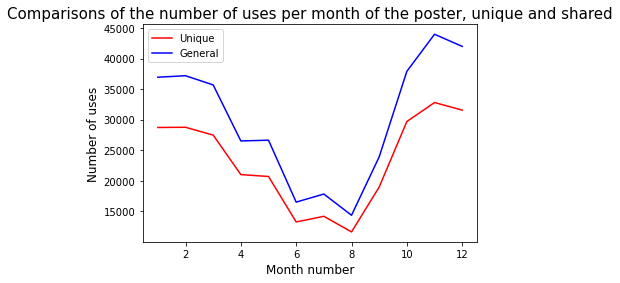

In [21]:
use_afisha_month_unig = visit.groupby('month').agg({'uid':['nunique']}).reset_index()
use_afisha_month_count = visit.groupby('month').agg({'uid':['count']}).reset_index()
display(use_afisha_month_unig.head(12))
display(use_afisha_month_unig.describe())
plt.plot(use_afisha_month_unig['month'], use_afisha_month_unig['uid']['nunique'], '-r');
plt.plot(use_afisha_month_count['month'], use_afisha_month_count['uid']['count'], '-b');
plt.title('Comparisons of the number of uses per month of the poster, unique and shared', fontsize=15, color='black')
plt.xlabel('Month number',fontsize=12, color='black')
plt.ylabel('Number of uses',fontsize=12, color='black')
plt.legend(['Unique', 'General'])
plt.show()

## Conclusion:  We see a spike in the use of the poster in autumn and winter, especially during the New Year's holidays when people are at home. During the holiday season, however, attendance drops.

## How many sessions per day?


,day,uid
,,count
0,1,10505
1,2,10985
2,3,11200
3,4,11346
4,5,11899


,day,uid
,,count
count,31.000000,31.000000
mean,16.000000,11593.548387
std,9.092121,1158.731745
min,1.000000,6988.000000
25%,8.500000,11241.500000
50%,16.000000,11730.000000
75%,23.500000,12024.500000
max,31.000000,14051.000000


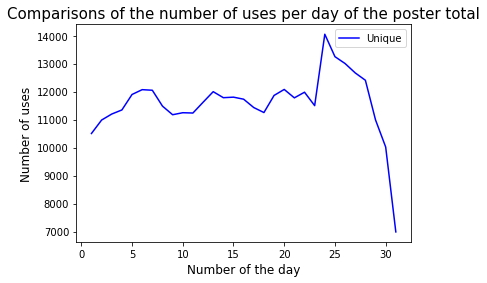

In [22]:
use_afisha_day_count = visit.groupby('day').agg({'uid':['count']}).reset_index()
display(use_afisha_day_count.head())
display(use_afisha_day_count.describe())
#plt.plot(use_afisha_day_count['day'], use_afisha_day_unig['uid'], '-r');
plt.plot(use_afisha_day_count['day'], use_afisha_day_count['uid']['count'], '-b');
plt.title('Comparisons of the number of uses per day of the poster total', fontsize=15, color='black')
plt.xlabel('Number of the day',fontsize=12, color='black')
plt.ylabel('Number of uses',fontsize=12, color='black')
plt.legend(['Unique', 'General'])
plt.show()

## Conclusion: well, we've actually already seen that..... we see spikes in the use of the poster at the beginning and closer to the end of the month. I think that the surge in the 20's of the month is due to the receipt of wages people are beginning to spend more money on entertainment.

## How long is one session?


In [23]:
display(visit.head())

,device,end_ts,source_id,start_ts,uid,day,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,26,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,52,12,2017


**add a column with the duration of the session**

In [24]:
visit['duration'] = visit['end_ts'] - visit['start_ts']
#visit['duration_sec'] = visit['duration'].dt.minute
display(visit.head())

,device,end_ts,source_id,start_ts,uid,day,week,month,year,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,12,2017,0 days 00:18:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2,2018,0 days 00:28:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,26,7,2017,0 days 00:00:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,5,2018,0 days 00:24:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,52,12,2017,0 days 00:00:00


In [25]:
visit['duration'].describe()

count                       359400
mean     0 days 00:10:43.025687256
std      0 days 00:16:37.127760516
min              -1 days +23:14:00
25%                0 days 00:02:00
50%                0 days 00:05:00
75%                0 days 00:14:00
max                0 days 11:51:00
Name: duration, dtype: object

**we can see that somewhere there's an end of a session greater than the beginning of a session**  
we calculate where

In [26]:
display(visit[visit['end_ts'] < visit['start_ts']])

,device,end_ts,source_id,start_ts,uid,day,week,month,year,duration
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,25,12,3,2018,-1 days +23:28:00
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,25,12,3,2018,-1 days +23:14:00


**delete these lines so they don't spoil our statistics**

In [27]:
visit.drop([4181, 177972], inplace=True)
display(visit[visit['end_ts'] < visit['start_ts']])

,device,end_ts,source_id,start_ts,uid,day,week,month,year,duration


**check**

In [28]:
visit['duration'].describe()

count                       359398
mean     0 days 00:10:43.042287380
std      0 days 00:16:37.105211646
min                0 days 00:00:00
25%                0 days 00:02:00
50%                0 days 00:05:00
75%                0 days 00:14:00
max                0 days 11:51:00
Name: duration, dtype: object

In [29]:
display(visit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359398 entries, 0 to 359399
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype          
---  ------     --------------   -----          
 0   device     359398 non-null  object         
 1   end_ts     359398 non-null  datetime64[ns] 
 2   source_id  359398 non-null  int64          
 3   start_ts   359398 non-null  datetime64[ns] 
 4   uid        359398 non-null  uint64         
 5   day        359398 non-null  int64          
 6   week       359398 non-null  int64          
 7   month      359398 non-null  int64          
 8   year       359398 non-null  int64          
 9   duration   359398 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(5), object(1), timedelta64[ns](1), uint64(1)
memory usage: 30.2+ MB


None

**we see 35,794 visits with zero duration**

In [30]:
display(visit[visit['duration'] == '00:00:00'].count())

device       35794
end_ts       35794
source_id    35794
start_ts     35794
uid          35794
day          35794
week         35794
month        35794
year         35794
duration     35794
dtype: int64

In [31]:
display(visit.head(2))

,device,end_ts,source_id,start_ts,uid,day,week,month,year,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,12,2017,0 days 00:18:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2,2018,0 days 00:28:00


In [32]:
display(visit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359398 entries, 0 to 359399
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype          
---  ------     --------------   -----          
 0   device     359398 non-null  object         
 1   end_ts     359398 non-null  datetime64[ns] 
 2   source_id  359398 non-null  int64          
 3   start_ts   359398 non-null  datetime64[ns] 
 4   uid        359398 non-null  uint64         
 5   day        359398 non-null  int64          
 6   week       359398 non-null  int64          
 7   month      359398 non-null  int64          
 8   year       359398 non-null  int64          
 9   duration   359398 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(5), object(1), timedelta64[ns](1), uint64(1)
memory usage: 30.2+ MB


None

#### Let's add a column with the number of minutes

In [33]:
visit['duration_min_int'] = visit['duration'].dt.total_seconds().div(60).astype(int)

In [34]:
display(visit.head(5))

,device,end_ts,source_id,start_ts,uid,day,week,month,year,duration,duration_min_int
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,12,2017,0 days 00:18:00,18
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2,2018,0 days 00:28:00,28
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,26,7,2017,0 days 00:00:00,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,5,2018,0 days 00:24:00,24
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,52,12,2017,0 days 00:00:00,0


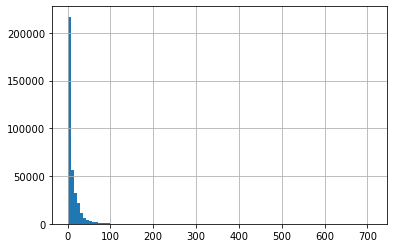

In [35]:
visit['duration_min_int'].hist(bins=100);

0   0 days 00:01:00
dtype: timedelta64[ns]

count                       359398
mean     0 days 00:10:43.042287380
std      0 days 00:16:37.105211646
min                0 days 00:00:00
25%                0 days 00:02:00
50%                0 days 00:05:00
75%                0 days 00:14:00
max                0 days 11:51:00
Name: duration, dtype: object

,duration
0,0 days 00:01:00


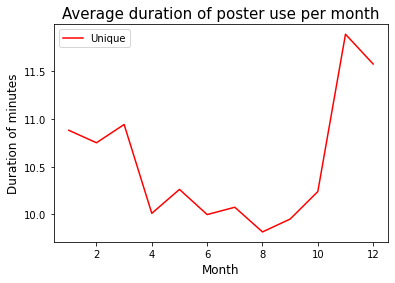

In [36]:
use_afisha_duration = visit.groupby('month').agg({'duration_min_int':'mean'}).reset_index()
#use_afisha_duration_median = visit.groupby('month').agg({'duration_min_int':'mode'})
display(visit['duration'].mode())
display(visit['duration'].describe())
display((visit[visit['month'] == 10][['duration']].mode()))
#display(use_afisha_duration.head())
#display(use_afisha_duration.describe())
#display(use_afisha_duration_median.head())
#display(use_afisha_duration_median.describe())
#plt.plot(use_afisha_day_count['day'], use_afisha_day_unig['uid'], '-r');
plt.plot(use_afisha_duration['month'], use_afisha_duration['duration_min_int'], '-r');
#plt.plot(use_afisha_duration_median['month'],use_afisha_duration_median['duration_min_int'], '-b');
plt.title('Average duration of poster use per month', fontsize=15, color='black')
plt.xlabel('Month',fontsize=12, color='black')
plt.ylabel('Duration of minutes',fontsize=12, color='black')
plt.legend(['Unique', 'General'])
plt.show()

## Conclusion:  We see a spike in the use of the poster in autumn and winter, especially during the New Year's holidays when people are at home. During the holiday season, however, attendance drops.

In [37]:
def mode_r(a):
    for i in range(1, a):
        display('The most common time period that users spend in the Playbill in ', i , 'month' ,(visit[visit['month'] == i][['duration']].mode()))

In [38]:
mode_r(13)

'The most common time period that users spend in the Playbill in '

1

'month'

,duration
0,0 days 00:01:00


'The most common time period that users spend in the Playbill in '

2

'month'

,duration
0,0 days 00:01:00


'The most common time period that users spend in the Playbill in '

3

'month'

,duration
0,0 days 00:01:00


'The most common time period that users spend in the Playbill in '

4

'month'

,duration
0,0 days 00:01:00


'The most common time period that users spend in the Playbill in '

5

'month'

,duration
0,0 days 00:01:00


'The most common time period that users spend in the Playbill in '

6

'month'

,duration
0,0 days 00:01:00


'The most common time period that users spend in the Playbill in '

7

'month'

,duration
0,0 days 00:01:00


'The most common time period that users spend in the Playbill in '

8

'month'

,duration
0,0 days 00:01:00


'The most common time period that users spend in the Playbill in '

9

'month'

,duration
0,0 days 00:01:00


'The most common time period that users spend in the Playbill in '

10

'month'

,duration
0,0 days 00:01:00


'The most common time period that users spend in the Playbill in '

11

'month'

,duration
0,0 days 00:01:00


'The most common time period that users spend in the Playbill in '

12

'month'

,duration
0,0 days 00:01:00


## Conclusion:  
#### - we see spikes in poster use in the fall and winter, especially during New Year's holidays when people are at home. During the holiday season, however, attendance drops.
### - the most common time that users spend in the service is one minute


## How often do people come back? ##


**Split users into cohorts Take the date when the user first became active**

In [39]:
visit_first_activity_date = visit.groupby(['uid'])['start_ts'].min()
visit_first_activity_date.name = 'first_activity_date'
display(visit_first_activity_date.head())


uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: first_activity_date, dtype: datetime64[ns]

In [40]:
visit_first_activity_date_gr = visit.groupby('uid').agg({'start_ts':'min'}).reset_index()
#visit_first_activity_date.name = 'first_activity_date'
visit_first_activity_date_gr = visit_first_activity_date_gr.set_index('uid')
display(visit_first_activity_date_gr.head())


,start_ts
uid,
11863502262781,2018-03-01 17:27:00
49537067089222,2018-02-06 15:55:00
297729379853735,2017-06-07 18:47:00
313578113262317,2017-09-18 22:49:00
325320750514679,2017-09-30 14:29:00


**join this data to the original table**

In [41]:
visit = visit.join(visit_first_activity_date, on='uid')
display(visit.head())

,device,end_ts,source_id,start_ts,uid,day,week,month,year,duration,duration_min_int,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,12,2017,0 days 00:18:00,18,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2,2018,0 days 00:28:00,28,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,26,7,2017,0 days 00:00:00,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,5,2018,0 days 00:24:00,24,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,52,12,2017,0 days 00:00:00,0,2017-12-27 14:06:00


**Collect users into cohorts by month, see retention by month, add a column with the month of the cohort**

In [42]:
visit['activity_month'] = visit['start_ts'].astype('datetime64[M]') 
visit['first_activity_month'] = visit['first_activity_date'].astype('datetime64[M]')                                   
display(visit.head())

,device,end_ts,source_id,start_ts,uid,day,week,month,year,duration,duration_min_int,first_activity_date,activity_month,first_activity_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,12,2017,0 days 00:18:00,18,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2,2018,0 days 00:28:00,28,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,26,7,2017,0 days 00:00:00,0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,5,2018,0 days 00:24:00,24,2018-03-09 20:05:00,2018-05-01,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,52,12,2017,0 days 00:00:00,0,2017-12-27 14:06:00,2017-12-01,2017-12-01


**Let's calculate the lifetime of the user within the cohort**  
[_](https://praktikum.yandex.ru/trainer/data-analyst/lesson/8224744d-28a9-48ce-947b-98a5f30d3104/task/ca0da3ac-3234-474f-a63b-0fd72742ce2c/)

In [43]:
visit['cohort_lifetime'] = visit['activity_month'] - visit['first_activity_month']
# We'll translate time into whole months.
visit['cohort_lifetime'] = visit['cohort_lifetime'] / np.timedelta64(1,'M')
visit['cohort_lifetime'] = visit['cohort_lifetime'].round().astype('int')
display(visit.head())

,device,end_ts,source_id,start_ts,uid,day,week,month,year,duration,duration_min_int,first_activity_date,activity_month,first_activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,12,2017,0 days 00:18:00,18,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2,2018,0 days 00:28:00,28,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,26,7,2017,0 days 00:00:00,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,5,2018,0 days 00:24:00,24,2018-03-09 20:05:00,2018-05-01,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,52,12,2017,0 days 00:00:00,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0


**Let us group the data by cohort and lifetime. Let's calculate for each cohort the number of active users for a given "month":**

In [44]:
cohorts = visit.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
display(cohorts.head())
display(cohorts.tail())

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


,first_activity_month,cohort_lifetime,uid
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760
77,2018-05-01,0,15273


**To find the Retention Rate, first get the number of users who were initially in the cohort and divide the number of users in each successive week by that number.**

**Let us find the initial number of users in the cohort. Let's take their number for week zero:**

In [45]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
display(initial_users_count) 

,first_activity_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [46]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
display(cohorts.head())

,first_activity_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


**Let's calculate the Retention Rate. Divide the number of active users in each of the weeks by the initial number of users in the cohort:**

In [47]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 
display(cohorts.head())

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


**Let's build a summary table and heat map:**<a id="cell1"></a>

In [48]:
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
display(retention_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


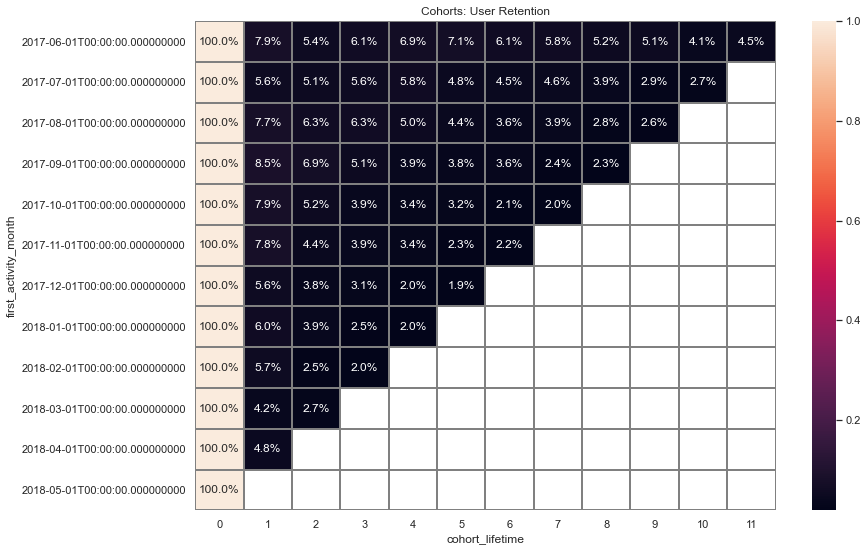

In [49]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');


**let's try a different design**

Nice date. Here.  
`yticklabels=retention_pivot.index.strftime('%Y.%m.%d')`  

scale size  
`vmin = 0, vmax = 150,`

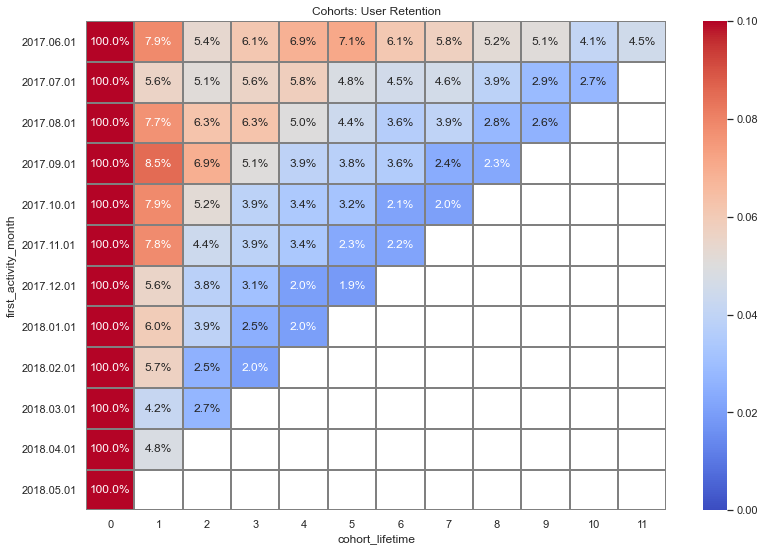

In [50]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin = 0, vmax = 0.1, 
            cmap = 'coolwarm', yticklabels=retention_pivot.index.strftime('%Y.%m.%d'));

# Conclusion: The later the registration, the fewer users return, and the percentage of returns decreases significantly over time. Perhaps there is a problem with long-term use of the service customers are not happy with his work.

## Let's see sales ##

## When do people start buying?


**Let's find the length of time between the first visit and the first purchase - draw a histogram, find the average and the median.**

In [51]:
display(visit.head())
display(order.head())

,device,end_ts,source_id,start_ts,uid,day,week,month,year,duration,duration_min_int,first_activity_date,activity_month,first_activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,12,2017,0 days 00:18:00,18,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2,2018,0 days 00:28:00,28,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,26,7,2017,0 days 00:00:00,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,5,2018,0 days 00:24:00,24,2018-03-09 20:05:00,2018-05-01,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,52,12,2017,0 days 00:00:00,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


**Let's make a summary table with the user's first visit and user ID**<a id="cell2"></a>

In [52]:
first_visit = visit.groupby(['uid']).agg({'start_ts':'min'}).reset_index()
display(first_visit.head())

,uid,start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


**connect to the purchase table by user**

In [53]:
order = order.merge(first_visit,on='uid')
display(order.head())

,buy_ts,revenue,uid,start_ts
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00


**let's add a column with the difference between the first call and the first purchase**

In [54]:
order['diff_first_buy'] = order['buy_ts'] - order['start_ts']
display(order.head())
display(order.info())

,buy_ts,revenue,uid,start_ts,diff_first_buy
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,0 days 00:01:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,0 days 00:11:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,0 days 00:02:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,0 days 00:15:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,0 days 00:27:00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   buy_ts          50415 non-null  datetime64[ns] 
 1   revenue         50415 non-null  float64        
 2   uid             50415 non-null  uint64         
 3   start_ts        50415 non-null  datetime64[ns] 
 4   diff_first_buy  50415 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), timedelta64[ns](1), uint64(1)
memory usage: 2.3 MB


None

In [55]:
display(order['diff_first_buy'].describe())

count                         50415
mean     37 days 00:53:06.287414460
std      70 days 14:39:40.373203781
min                 0 days 00:00:00
25%                 0 days 00:06:00
50%                 0 days 03:26:00
75%                38 days 09:22:30
max               364 days 08:29:00
Name: diff_first_buy, dtype: object

**convert time to integer minutes and convert time to integers to build a histogram**<a id="cell3"></a>  
no histogram in time format????

In [56]:
# Let's convert the time to whole minutes
#order['time_for_hist'] = order['diff_first_buy'] / np.timedelta64(1,'m')
# and convert the time to integers
#order['time_for_hist'] = order['time_for_hist'].round().astype('int')

** or so we'll translate **

In [57]:
order['time_for_hist'] = order['diff_first_buy'].dt.total_seconds().div(60).astype(int)

In [58]:
display(order.head())
display(order.tail())

,buy_ts,revenue,uid,start_ts,diff_first_buy,time_for_hist
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,0 days 00:01:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,0 days 00:11:00,11
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,0 days 00:02:00,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,0 days 00:15:00,15
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,0 days 00:27:00,27


,buy_ts,revenue,uid,start_ts,diff_first_buy,time_for_hist
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,0 days 14:39:00,879
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,0 days 00:45:00,45
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,0 days 00:02:00,2
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,220 days 11:24:00,317484
50414,2018-06-01 00:02:00,3.42,83872787173869366,2018-05-31 23:59:00,0 days 00:03:00,3


Text(0.5, 0, 'Time difference between first visit and first purchase min.')

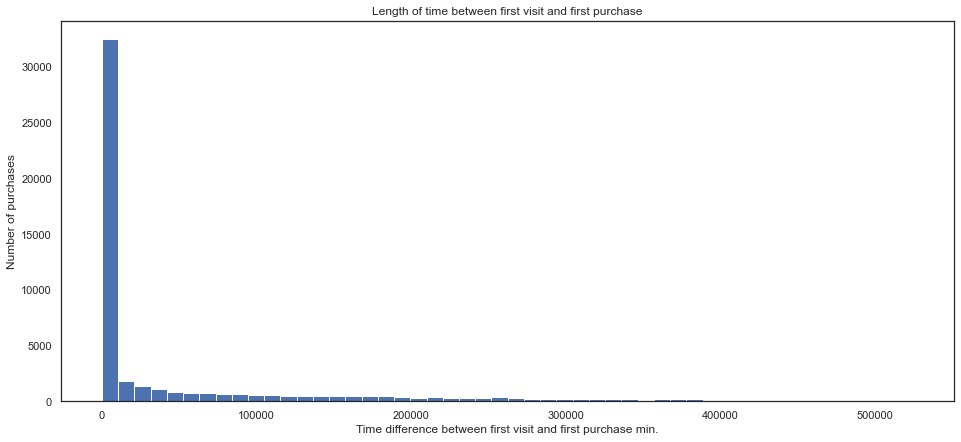

In [59]:
plt.figure(figsize=(16, 7))
plt.hist(order['time_for_hist'], bins=50)
plt.title('Length of time between first visit and first purchase')
plt.ylabel('Number of purchases')
plt.xlabel('Time difference between first visit and first purchase min.')

# Conclusion:
### - most purchases occur within 5000 minutes = 3 - 4 days

## How many times do they buy in a period?


In [60]:
display(order.head())

,buy_ts,revenue,uid,start_ts,diff_first_buy,time_for_hist
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,0 days 00:01:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,0 days 00:11:00,11
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,0 days 00:02:00,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,0 days 00:15:00,15
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,0 days 00:27:00,27


In [61]:
order_buy_period = order[['buy_ts','uid']]
display(order_buy_period.head() )

,buy_ts,uid
0,2017-06-01 00:10:00,10329302124590727494
1,2017-06-01 00:25:00,11627257723692907447
2,2017-06-01 00:27:00,17903680561304213844
3,2017-06-01 00:29:00,16109239769442553005
4,2017-06-01 07:58:00,14200605875248379450


**добавим столбцы с периодами**

In [62]:
order_buy_period['buy_year']  = order_buy_period['buy_ts'].dt.year
order_buy_period['buy_month'] = order_buy_period['buy_ts'].dt.month
order_buy_period['buy_week']  = order_buy_period['buy_ts'].dt.week
order_buy_period['buy_date'] = order_buy_period['buy_ts'].dt.date
display(order_buy_period.head() )

,buy_ts,uid,buy_year,buy_month,buy_week,buy_date
0,2017-06-01 00:10:00,10329302124590727494,2017,6,22,2017-06-01
1,2017-06-01 00:25:00,11627257723692907447,2017,6,22,2017-06-01
2,2017-06-01 00:27:00,17903680561304213844,2017,6,22,2017-06-01
3,2017-06-01 00:29:00,16109239769442553005,2017,6,22,2017-06-01
4,2017-06-01 07:58:00,14200605875248379450,2017,6,22,2017-06-01


### How many times a week

In [63]:
order_buy_period_week = order_buy_period.groupby(['buy_year','buy_month','buy_week']).agg({'uid':'count'})
display(order_buy_period_week.head())

uid
buy_year buy_month buy_week     
2017     6         22        340
                   23        938
                   24        343
                   25        371
                   26        362

In [64]:
order_buy_period_week = order_buy_period.groupby(['buy_year','buy_month','buy_week']).agg({'uid':'count'}).reset_index()

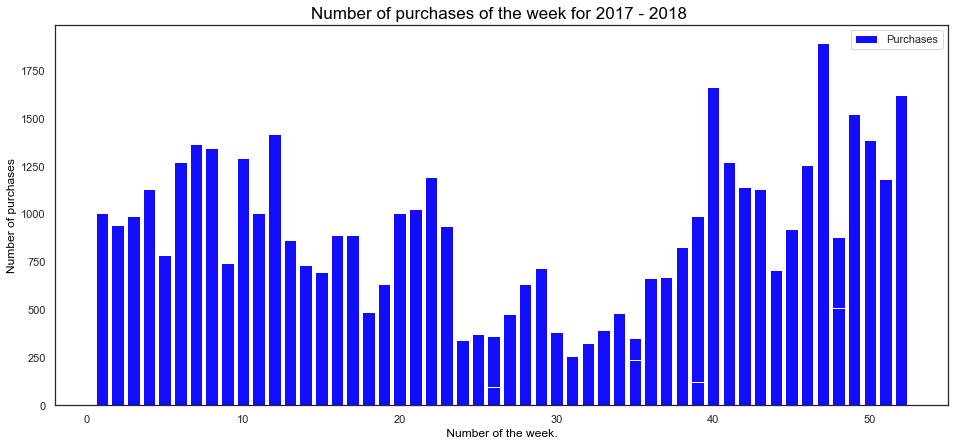

In [65]:
plt.figure(figsize=(16, 7))
plt.bar(order_buy_period_week['buy_week'], order_buy_period_week['uid'], color=(0.07, 0.05, 1));
plt.title('Number of purchases of the week for 2017 - 2018 ', fontsize=17, color='black')
plt.xlabel(' Number of the week. ',fontsize=12, color='black')
plt.ylabel('Number of purchases',fontsize=12, color='black')
plt.legend(['Purchases']);


## Conclusion:  We see a spike in the use of the poster in autumn and winter, especially during the New Year's holidays when people are at home. During the holiday season, however, attendance drops.

### How many times a month

In [66]:
order_buy_period_month = order_buy_period.groupby(['buy_year','buy_month']).agg({'uid':'count'})
display(order_buy_period_week.head())

,buy_year,buy_month,buy_week,uid
0,2017,6,22,340
1,2017,6,23,938
2,2017,6,24,343
3,2017,6,25,371
4,2017,6,26,362


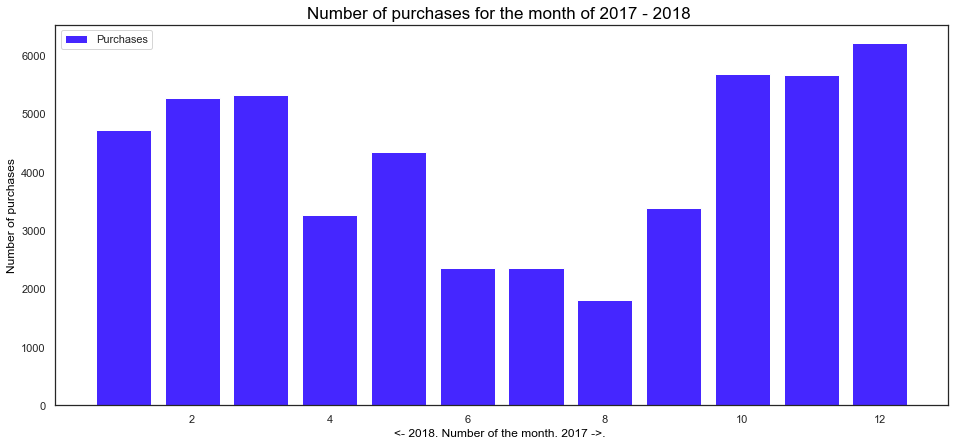

In [67]:
order_buy_period_month = order_buy_period.groupby(['buy_year','buy_month']).agg({'uid':'count'}).reset_index()
plt.figure(figsize=(16, 7))
plt.bar(order_buy_period_month['buy_month'], order_buy_period_month['uid'], color=(0.27, 0.15, 1));
plt.title('Number of purchases for the month of 2017 - 2018 ', fontsize=17, color='black')
plt.xlabel('<- 2018. Number of the month. 2017 ->. ',fontsize=12, color='black')
plt.ylabel('Number of purchases',fontsize=12, color='black')
plt.legend([ 'Purchases']);


<div class="alert alert-info">
    <strong>Хорошо бы узнать среднее число покупок на 1 клиента за какой-то период времени, например пол года</strong> </div>

**Оставим только первые 6 месяцев в талице**

In [68]:
order_buy_six = order_buy_period[order_buy_period['buy_month'] <= 6]
display(order_buy_six.head())

,buy_ts,uid,buy_year,buy_month,buy_week,buy_date
0,2017-06-01 00:10:00,10329302124590727494,2017,6,22,2017-06-01
1,2017-06-01 00:25:00,11627257723692907447,2017,6,22,2017-06-01
2,2017-06-01 00:27:00,17903680561304213844,2017,6,22,2017-06-01
3,2017-06-01 00:29:00,16109239769442553005,2017,6,22,2017-06-01
4,2017-06-01 07:58:00,14200605875248379450,2017,6,22,2017-06-01


In [69]:
display('Average number of purchases per customer per half year', order_buy_six['uid'].count()/order_buy_six['uid'].nunique() )

'Average number of purchases per customer per half year'

1.3101698425849213

## Conclusion:  We see a spike in the use of the poster in autumn and winter, especially during the New Year's holidays when people are at home. During the holiday season, however, attendance drops.

## How the average cheque is changing


In [70]:
display(order.head())

,buy_ts,revenue,uid,start_ts,diff_first_buy,time_for_hist
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,0 days 00:01:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,0 days 00:11:00,11
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,0 days 00:02:00,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,0 days 00:15:00,15
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,0 days 00:27:00,27


**Create a table without unnecessary rows**

In [71]:
order_aver_bill = order[['buy_ts', 'revenue','uid']]
display(order_aver_bill.head())

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


**создадим когорты покупателей по первой покупке**

In [72]:

order_aver_bill_first = order_aver_bill.groupby('uid')['buy_ts'].min()
order_aver_bill_first.name = 'first_order_date'
display(order_aver_bill_first.head())

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: first_order_date, dtype: datetime64[ns]

**attach them to the table by user**

In [73]:
order_aver_bill = order_aver_bill.join(order_aver_bill_first, on='uid')
display(order_aver_bill.head())

,buy_ts,revenue,uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


**convert the fields into months**

In [74]:
order_aver_bill['first_order_month'] = order_aver_bill['first_order_date'].astype('datetime64[M]')
order_aver_bill['order_month'] = order_aver_bill['buy_ts'].astype('datetime64[M]')
display(order_aver_bill.head())

,buy_ts,revenue,uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


**We make a summary table of how much each customer spent, sorted by cohort**

In [75]:
cohorts_order_aver_bill = order_aver_bill.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum', 'uid':'nunique'})
display(cohorts_order_aver_bill.head())

revenue   uid
first_order_month order_month               
2017-06-01        2017-06-01   9557.49  2023
                  2017-07-01    981.82    61
                  2017-08-01    885.34    50
                  2017-09-01   1931.30    54
                  2017-10-01   2068.58    88

**Найдём средний чек покупателя revenue_per_user — разделим показатель revenue на uid  
и добавим столбец со средним чеком**

In [76]:
cohorts_order_aver_bill['revenue_per_user'] = cohorts_order_aver_bill['revenue'] / cohorts_order_aver_bill['uid'] 
display(cohorts_order_aver_bill.head())

revenue   uid  revenue_per_user
first_order_month order_month                                 
2017-06-01        2017-06-01   9557.49  2023          4.724414
                  2017-07-01    981.82    61         16.095410
                  2017-08-01    885.34    50         17.706800
                  2017-09-01   1931.30    54         35.764815
                  2017-10-01   2068.58    88         23.506591

**Let's build a summary table of changes in the average receipt in cohorts by month of purchase and evaluate how the average receipt changes over time**

In [77]:
cohorts_order_aver_bill.pivot_table(index='first_order_month',columns='order_month',values='revenue_per_user',aggfunc='mean') 

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


**To estimate how the average bill varies with the time since the first purchase  
For a cohort of buyers, this indicator is called lifetime. "time of life").  
This metric for each event shows in which month of the cohort month it occurred.**  


In [78]:
cohorts_order_aver_bill=cohorts_order_aver_bill.reset_index()
display(cohorts_order_aver_bill.head())

,first_order_month,order_month,revenue,uid,revenue_per_user
0,2017-06-01,2017-06-01,9557.49,2023,4.724414
1,2017-06-01,2017-07-01,981.82,61,16.095410
2,2017-06-01,2017-08-01,885.34,50,17.706800
3,2017-06-01,2017-09-01,1931.30,54,35.764815
4,2017-06-01,2017-10-01,2068.58,88,23.506591


**Let's find the cohorts. From order_month subtract first_order_month cohort month**

In [79]:
cohorts_order_aver_bill['cohort_lifetime'] = cohorts_order_aver_bill['order_month'] - cohorts_order_aver_bill['first_order_month']
display(cohorts_order_aver_bill.head())

,first_order_month,order_month,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0 days
1,2017-06-01,2017-07-01,981.82,61,16.095410,30 days
2,2017-06-01,2017-08-01,885.34,50,17.706800,61 days
3,2017-06-01,2017-09-01,1931.30,54,35.764815,92 days
4,2017-06-01,2017-10-01,2068.58,88,23.506591,122 days


**reduce cohort_lifetime to the number of the month in which the event occurred**


In [80]:
cohorts_order_aver_bill['cohort_lifetime'] = (cohorts_order_aver_bill['cohort_lifetime'] 
                                              / np.timedelta64(1,'M')).round().astype('int')
display(cohorts_order_aver_bill.head())

,first_order_month,order_month,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0
1,2017-06-01,2017-07-01,981.82,61,16.095410,1
2,2017-06-01,2017-08-01,885.34,50,17.706800,2
3,2017-06-01,2017-09-01,1931.30,54,35.764815,3
4,2017-06-01,2017-10-01,2068.58,88,23.506591,4


In [81]:
cohort_lifetime_order_aver_bill = cohorts_order_aver_bill.pivot_table(index='first_order_month',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean')
display(cohort_lifetime_order_aver_bill)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07-01,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09-01,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10-01,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11-01,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Let's build a heat table**

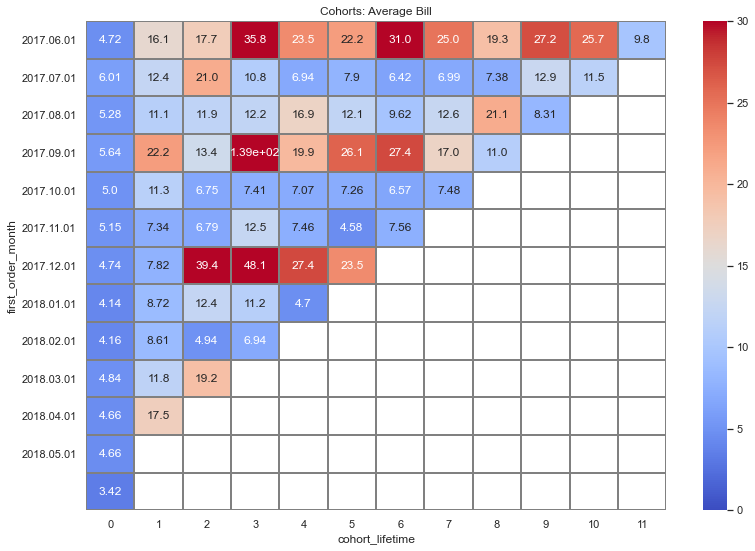

In [82]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Average Bill')
sns.heatmap(cohort_lifetime_order_aver_bill, annot=True, fmt='.3', linewidths=1, linecolor='gray', vmin = 0, vmax = 30, 
            cmap = 'coolwarm', yticklabels=retention_pivot.index.strftime('%Y.%m.%d'));

# Conclusion: Basically, we see an increase in the average check after starting to use the service and a sharp drop by the end of the sampling period

In [83]:
display(cohorts_order_aver_bill.head())

,first_order_month,order_month,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0
1,2017-06-01,2017-07-01,981.82,61,16.095410,1
2,2017-06-01,2017-08-01,885.34,50,17.706800,2
3,2017-06-01,2017-09-01,1931.30,54,35.764815,3
4,2017-06-01,2017-10-01,2068.58,88,23.506591,4


**Let's make a summary table by months with total revenue and number of customers, add a column with the average receipt**

,first_order_month,revenue,uid,aver_bill_month
0,2017-06-01,24031.69,2653,9.058308
1,2017-07-01,16127.92,2348,6.868790
2,2017-08-01,11606.26,1721,6.743905
3,2017-09-01,34676.32,3147,11.018850
4,2017-10-01,27603.45,5049,5.467112
5,2017-11-01,26098.99,4720,5.529447
6,2017-12-01,33485.74,4842,6.915684
7,2018-01-01,16663.13,3658,4.555257
8,2018-02-01,16750.50,3866,4.332773
9,2018-03-01,19273.41,3681,5.235917


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   first_order_month  13 non-null     datetime64[ns]
 1   revenue            13 non-null     float64       
 2   uid                13 non-null     int64         
 3   aver_bill_month    13 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 544.0 bytes


None

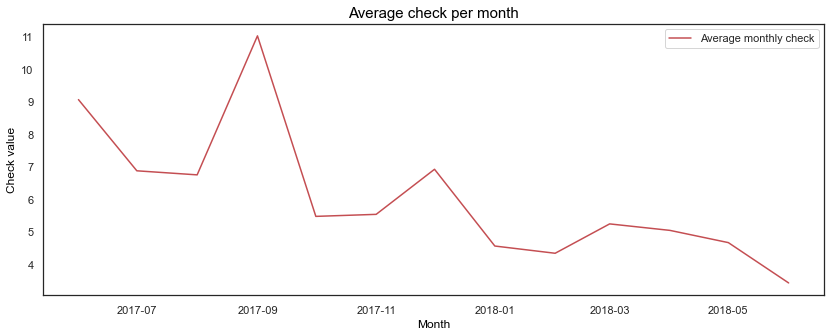

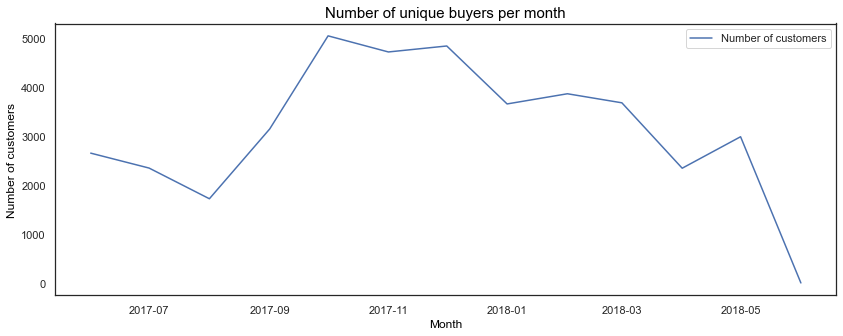

In [84]:
cohorts_order_aver_bill_one = cohorts_order_aver_bill.groupby('first_order_month').agg({'revenue':'sum','uid':'sum'}).reset_index()
cohorts_order_aver_bill_one['aver_bill_month'] = cohorts_order_aver_bill_one['revenue']/cohorts_order_aver_bill_one['uid']
display(cohorts_order_aver_bill_one)
display(cohorts_order_aver_bill_one.info())
plt.figure(figsize=(14, 5))
plt.plot(cohorts_order_aver_bill_one['first_order_month'], cohorts_order_aver_bill_one['aver_bill_month'], '-r')
#plt.plot(cohorts_order_aver_bill_one['first_order_month'], cohorts_order_aver_bill_one['uid'], '-b')
plt.title('Average check per month', fontsize=15, color='black')
plt.xlabel('Month',fontsize=12, color='black')
plt.ylabel('Check value',fontsize=12, color='black')
plt.legend(['Average monthly check'])
plt.show()

plt.figure(figsize=(14, 5))
#plt.plot(cohorts_order_aver_bill_one['first_order_month'], cohorts_order_aver_bill_one['aver_bill_month'], '-r')
plt.plot(cohorts_order_aver_bill_one['first_order_month'], cohorts_order_aver_bill_one['uid'], '-b')
plt.title('Number of unique buyers per month', fontsize=15, color='black')
plt.xlabel('Month',fontsize=12, color='black')
plt.ylabel('Number of customers',fontsize=12, color='black')
plt.legend(['Number of customers'])
plt.show()

# Conclusion:  over time we see a downward trend in the average bill and the number of customers, but by the New Year holidays the number of new customers is on the rise

## How much money is being made? (LTV)


**Let's take a look at the distribution of order dates**

In [85]:
display(order.head())

,buy_ts,revenue,uid,start_ts,diff_first_buy,time_for_hist
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,0 days 00:01:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,0 days 00:11:00,11
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,0 days 00:02:00,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,0 days 00:15:00,15
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,0 days 00:27:00,27


In [86]:
order['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [87]:
display(cost.head(1))

,source_id,data,costs
0,1,2017-06-01,75.2


In [88]:
cost['data'].describe()

count                    2542
unique                    364
top       2017-06-28 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: data, dtype: object

In [89]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   data       2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


**Let's estimate Afisha's margin for the specified period**

In [90]:
display('Gross income -',order['revenue'].sum())
display('Marketing costs -',cost['costs'].sum())
marja_afish = order['revenue'].sum() - cost['costs'].sum()
display('Profit/loss -', marja_afish)

'Gross income -'

252057.2

'Marketing costs -'

329131.62

'Profit/loss -'

-77074.41999999998

**so far we're seeing a loss-making operation**

**Let's form monthly cohorts**

In [91]:
order = order[['buy_ts', 'revenue', 'uid']]

In [92]:
order['order_month'] = order['buy_ts'].astype('datetime64[M]')
cost['month'] = cost['data'].astype('datetime64[M]') 
display(order.head(2))
display(cost.head(2))

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01


,source_id,data,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01


**month of each customer's first purchase**

In [93]:
first_order = order.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_order.columns = ['uid', 'first_order_month']
display(first_order.head(2))

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01


**Calculate the number of new buyers (n_buyers) for each month**

In [94]:
cohort_sizes = first_order.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
display(cohort_sizes.head())

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


**add the month of the first purchase to the order table**

In [95]:
orders_new = pd.merge(order, first_order, on='uid')
display(orders_new.head(2))

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01


**Let's group the order table by the month of first purchase and month of each order and add up the revenue**

In [96]:
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
display(cohorts.head(2)) 
display(cohorts.info()) 

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   first_order_month  79 non-null     datetime64[ns]
 1   order_month        79 non-null     datetime64[ns]
 2   revenue            79 non-null     float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 2.0 KB


None

**how many people made their first purchase in each month**

In [97]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
display(report.head()) 

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


**you need to find the gross profit by multiplying the revenue by the margin. Second, LTV is a relative measure. So it is more convenient to look at it by "age" cohorts, where the columns are not the month of the order, but the age (age) of the cohort**

**Since the margin is not specified, put it at 100%**

In [98]:
margin_rate = 1
    
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
display(report.head(2)) 

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1


**Let's find the LTV. Divide the gross profit of the cohorts for each month by the total number of users in each cohort**

In [99]:
report['ltv'] = report['gp'] / report['n_buyers']
display(report.head())

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531


In [100]:
ltv_cohorts = report.groupby('first_order_month').agg({'ltv': 'sum'}).reset_index()
display(ltv_cohorts)

,first_order_month,ltv
0,2017-06-01,11.879234
1,2017-07-01,8.386854
2,2017-08-01,8.471723
3,2017-09-01,13.435227
4,2017-10-01,6.360242
5,2017-11-01,6.395244
6,2017-12-01,7.639913
7,2018-01-01,4.940151
8,2018-02-01,4.587921
9,2018-03-01,5.455253


**For clarity, we visualize the cohorts in the form of a summary table**

<div class="alert alert-info">
    
**`output = output.cumsum(axis=1).round(2)` добавлено**     
    </div>

In [101]:
output = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
output = output.cumsum(axis=1).round(2) 
display(output)
    

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.40,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.92,6.99,7.30,7.64,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.88,4.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.51,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


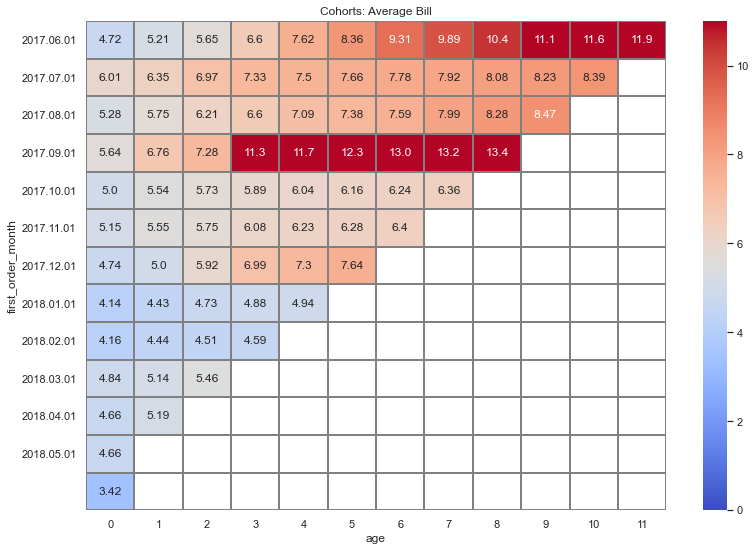

In [102]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Average Bill')
sns.heatmap(output, annot=True, fmt='.3', linewidths=1, linecolor='gray', vmin = 0, vmax = 11, 
            cmap = 'coolwarm', yticklabels=retention_pivot.index.strftime('%Y.%m.%d'));

**Over the year, every customer in every cohort brought**

In [103]:
ltv_cohorts = report.groupby('first_order_month').agg({'ltv': 'sum'}).reset_index()

display(ltv_cohorts)
display(ltv_cohorts.info())

,first_order_month,ltv
0,2017-06-01,11.879234
1,2017-07-01,8.386854
2,2017-08-01,8.471723
3,2017-09-01,13.435227
4,2017-10-01,6.360242
5,2017-11-01,6.395244
6,2017-12-01,7.639913
7,2018-01-01,4.940151
8,2018-02-01,4.587921
9,2018-03-01,5.455253


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   first_order_month  13 non-null     datetime64[ns]
 1   ltv                13 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 336.0 bytes


None

## Schedule with dates <a id="cell4"></a>

<Figure size 1152x720 with 0 Axes>

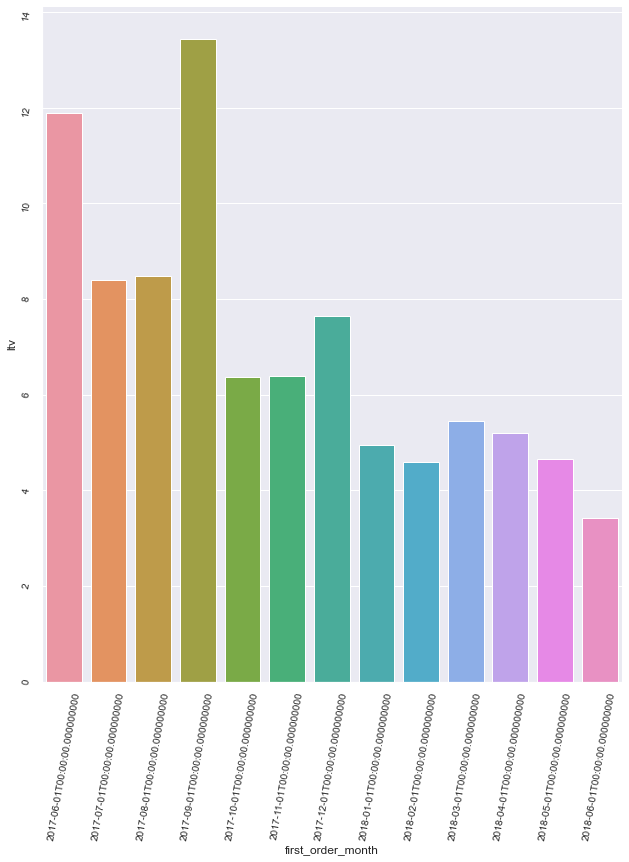

In [104]:
plt.figure(figsize=(16, 10))
sns.set_style('darkgrid')
sns.catplot(x='first_order_month', y='ltv', height=10, data=ltv_cohorts, kind='bar');
plt.xticks(rotation=80, fontsize=10)
plt.yticks(rotation=80, fontsize=10)
plt.show();

In [105]:
ltv_cohorts['first_order_month'] = ltv_cohorts['first_order_month'].dt.month
#ltv_cohorts['first_order_month'] = pd.to_datetime(ltv_cohorts['first_order_month'])


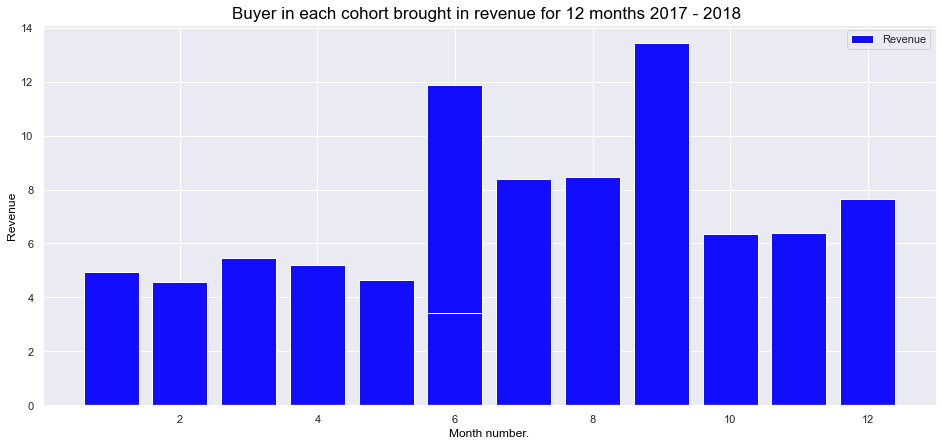

In [106]:
plt.figure(figsize=(16, 7))
plt.bar(ltv_cohorts['first_order_month'], ltv_cohorts['ltv'], color=(0.07, 0.05, 1))
plt.title('Buyer in each cohort brought in revenue for 12 months 2017 - 2018 ', fontsize=17, color='black')
plt.xlabel('Month number.',fontsize=12, color='black')
plt.ylabel('Revenue',fontsize=12, color='black')
plt.legend(['Revenue']);


**check**

In [107]:
ltv_2017_06_01 = output.loc['2017-06-01'].sum()
ltv_2017_07_01 = output.loc['2017-07-01'].sum()
print(ltv_2017_06_01) 
print(ltv_2017_07_01)

102.36
82.22


# Conclusion:Maximum revenue buyers bring the first month of using the service, then the proceeds fall, but there are bursts.

In [108]:
display(report.head())
display(report.info())

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   first_order_month  79 non-null     datetime64[ns]
 1   n_buyers           79 non-null     int64         
 2   order_month        79 non-null     datetime64[ns]
 3   revenue            79 non-null     float64       
 4   gp                 79 non-null     float64       
 5   age                79 non-null     int32         
 6   ltv                79 non-null     float64       
dtypes: datetime64[ns](2), float64(3), int32(1), int64(1)
memory usage: 4.6 KB


None

In [109]:
report_six_month = report[report['first_order_month'] <= '2017-11-01']
report_six_month = report_six_month[report_six_month['age'] <= 6]
display(report_six_month.head())

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531


In [110]:
output_six_month = report_six_month.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
output_six_month = output_six_month.cumsum(axis=1).round(2) 
display(output_six_month)

age,0,1,2,3,4,5,6
first_order_month,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31
2017-07-01,6.01,6.35,6.97,7.33,7.50,7.66,7.78
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.38,7.59
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.40


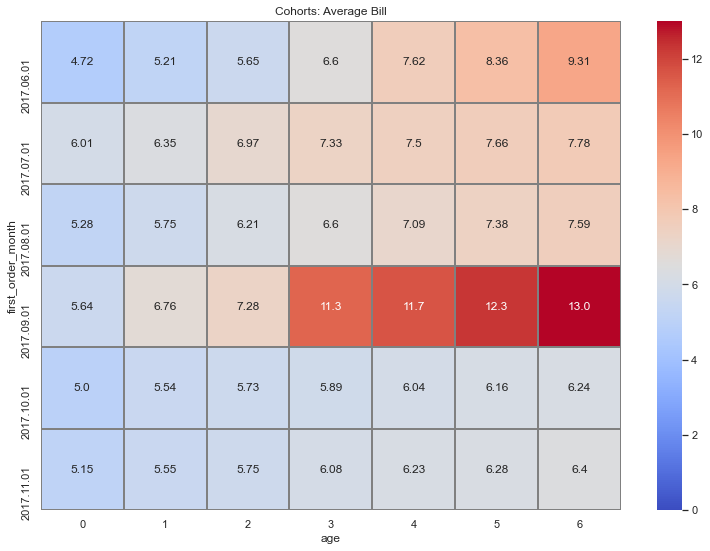

In [111]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Average Bill')
sns.heatmap(output_six_month, annot=True, fmt='.3', linewidths=1, linecolor='gray', vmin = 0, vmax = 13, 
            cmap = 'coolwarm', yticklabels=output_six_month.index.strftime('%Y.%m.%d'));

**In six months, every customer brought**

In [112]:
display(report_six_month.head())

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531


In [113]:
ltv_six_month = report_six_month.groupby('first_order_month').agg({'ltv': 'sum'}).reset_index()
display(ltv_six_month.info())
display(ltv_six_month)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   first_order_month  6 non-null      datetime64[ns]
 1   ltv                6 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 224.0 bytes


None

,first_order_month,ltv
0,2017-06-01,9.310524
1,2017-07-01,7.780983
2,2017-08-01,7.586526
3,2017-09-01,13.008071
4,2017-10-01,6.244772
5,2017-11-01,6.395244


<Figure size 1152x720 with 0 Axes>

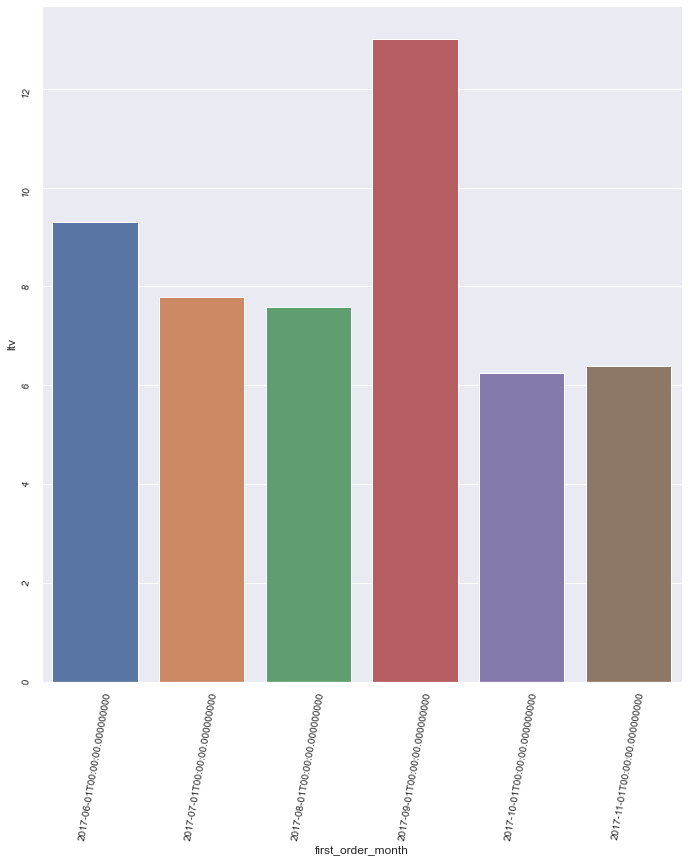

In [114]:
plt.figure(figsize=(16, 10))
sns.set_style('darkgrid')
sns.catplot(x='first_order_month', y='ltv', height=10, data=ltv_six_month, kind='bar');
plt.xticks(rotation=80, fontsize=10)
plt.yticks(rotation=80, fontsize=10)
plt.show();

In [115]:
#plt.figure(figsize=(16, 7))
#plt.bar(ltv_six_month['first_order_month'], ltv_six_month['ltv'], color=(0.67, 0.25, 1));
#plt.title('Покупатель в каждой когорте принес выручки за 6 месяцев года ', fontsize=17, color='black')
#plt.xlabel('Месяц.',fontsize=12, color='black')
#plt.ylabel('Выручка',fontsize=12, color='black')
#plt.legend([ 'Выручка']);


## Conclusion: We can see a drop in revenue over time, we also see a strange spike in revenue per customer in September 2017, possibly due to some large unit purchases during this period 
### Conclusion: We can see a drop in revenue over time, we also see a strange spike in revenue per customer in September 2017, possibly due to some large unit purchases during this period

# Marketing
### How much money has been spent in total 

In [116]:
display(cost.head(2))

,source_id,data,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01


In [117]:
display('Всего на маркетинг потратили - ', cost['costs'].sum())

'Всего на маркетинг потратили - '

329131.62

### For every source

In [118]:
display(cost.groupby('source_id').agg({'costs':'sum'}))

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


### In time.

In [119]:
display(cost.groupby('month').agg({'costs':'sum'}))

,costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


### How much did it cost to attract one visitor from each source?


**Let's build summary tables of marketing expenditures for each source**

In [120]:
cost_every_source = cost.groupby(['month', 'source_id']).agg({'costs':'sum'}).reset_index()
cost_every_source = cost_every_source.rename(columns={'month':'data'})
display(cost_every_source.head())
display(cost_every_source.info())
display(cost_every_source['costs'].sum())

,data,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   data       84 non-null     datetime64[ns]
 1   source_id  84 non-null     int64         
 2   costs      84 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 KB


None

329131.61999999994

**Number of visitors acquired on each specific date from each specific source**

In [121]:
visit_date_source = visit.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first', 'start_ts': 'first'}).reset_index()
visit_date_source = visit_date_source.rename(columns={'start_ts':'data'})
visit_date_source['data'] = visit_date_source['data'].astype('datetime64[M]')
display(visit_date_source.head())
display(visit_date_source.info())

,uid,source_id,data
0,11863502262781,3,2018-03-01
1,49537067089222,2,2018-02-01
2,297729379853735,3,2017-06-01
3,313578113262317,2,2017-09-01
4,325320750514679,5,2017-09-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228169 entries, 0 to 228168
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   uid        228169 non-null  uint64        
 1   source_id  228169 non-null  int64         
 2   data       228169 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), uint64(1)
memory usage: 5.2 MB


None

**Number of visitors attracted from a specific source by month**

In [122]:
visit_count_uid = visit_date_source.groupby(['data','source_id']).agg({'uid':'nunique'}).reset_index()
display(visit_count_uid.head())
print()
display('Amount of marketing expenditure per source' , cost_every_source.head())
display( visit_count_uid.info())

,data,source_id,uid
0,2017-06-01,1,631
1,2017-06-01,2,1262
2,2017-06-01,3,4080
3,2017-06-01,4,3447
4,2017-06-01,5,2728


'Amount of marketing expenditure per source'

,data,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   data       98 non-null     datetime64[ns]
 1   source_id  98 non-null     int64         
 2   uid        98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


None

**Connect the tables of the number of visitors from each source and the amount spent on them**

In [123]:
costs_to_client = pd.merge(visit_count_uid, cost_every_source, on=['source_id', 'data'])
display(costs_to_client.head())
#display(costs_to_client.info())

,data,source_id,uid,costs
0,2017-06-01,1,631,1125.61
1,2017-06-01,2,1262,2427.38
2,2017-06-01,3,4080,7731.65
3,2017-06-01,4,3447,3514.80
4,2017-06-01,5,2728,2616.12


**Insert the cost per client column**

In [124]:
costs_to_one_client = costs_to_client.groupby('source_id').agg({'uid':'sum', 'costs':'sum'}).reset_index()
costs_to_one_client['attracting_one_buyer'] = costs_to_client['costs']/costs_to_client['uid']
costs_to_one_client = costs_to_one_client.sort_values(by='attracting_one_buyer', ascending=False)
display(costs_to_one_client.head(10))

,source_id,uid,costs,attracting_one_buyer
1,2,17616,42806.04,1.923439
2,3,66116,141321.63,1.895012
0,1,9469,20833.27,1.783851
3,4,72346,61073.60,1.019669
4,5,49237,51757.10,0.958988
6,10,6903,5822.49,0.793485
5,9,6448,5517.49,0.400028


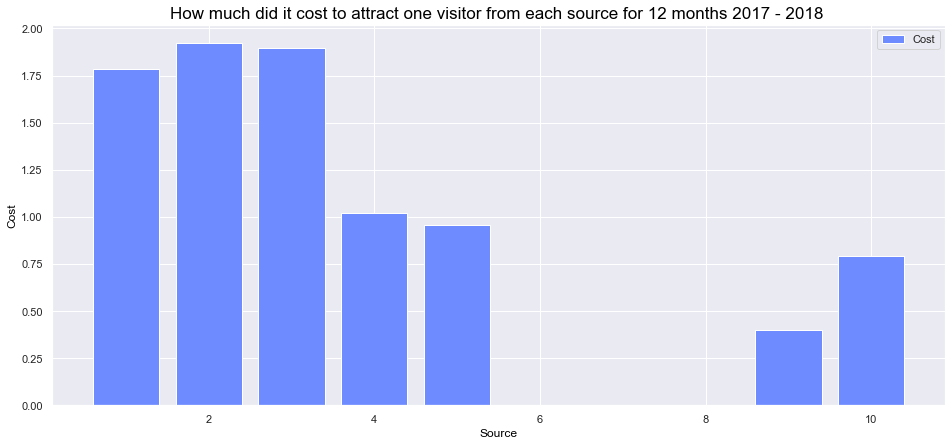

In [125]:
plt.figure(figsize=(16, 7))
plt.bar(costs_to_one_client['source_id'], costs_to_one_client['attracting_one_buyer'], color=(0.43, 0.55, 1))
plt.title('How much did it cost to attract one visitor from each source for 12 months 2017 - 2018 ', fontsize=17, color='black')
plt.xlabel('Source',fontsize=12, color='black')
plt.ylabel('Cost',fontsize=12, color='black')
plt.legend([ 'Cost']);


# Conclusion: We have the lowest cost per customer for sources 9 and 10

In [126]:
display('visit', visit.head(2))
display('cost',cost.head(2))
display('order',order.head(2))

'visit'

,device,end_ts,source_id,start_ts,uid,day,week,month,year,duration,duration_min_int,first_activity_date,activity_month,first_activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,12,2017,0 days 00:18:00,18,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2,2018,0 days 00:28:00,28,2018-02-19 16:53:00,2018-02-01,2018-02-01,0


'cost'

,source_id,data,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01


'order'

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01


In [127]:
# shoppers by channel
visits_sorted = visit.sort_values(by='start_ts')
#display(visits_sorted.head(2))
# channel costs
costs_per_source = cost.groupby('source_id').agg({'costs': 'sum'})

# revenue by channel
first_source_per_user = visits_sorted.groupby('uid').agg({'source_id': 'first'})

display('first_source_per_user', first_source_per_user.head())

client_per_source = order.merge(first_source_per_user, on='uid')

display('Merge_client_per_source', client_per_source.head())

# summarize the number of customers from the channel
client_per_source = client_per_source.groupby('source_id').agg({'uid': 'nunique'})

display('client_per_source', client_per_source.head(20))

'first_source_per_user'

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5


'Merge_client_per_source'

,buy_ts,revenue,uid,order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3


'client_per_source'

,uid
source_id,
1,2899
2,3506
3,10473
4,10296
5,6931
7,1
9,1088
10,1329


In [128]:
# уникальные пользователи по каналам
# общее количество визитов с каждого источника
uid_per_source = visits_sorted.groupby('source_id').agg({'uid': 'nunique'})
display('uid_per_source', uid_per_source.head(20))
rev_per_source = order.merge(first_source_per_user, on='uid')
rev_per_source = rev_per_source.groupby('source_id').agg({'revenue': 'sum'})

rev_uid_costs_per_source = pd.concat([costs_per_source, rev_per_source, 
                                      uid_per_source, client_per_source],axis=1).fillna(0)
rev_uid_costs_per_source = rev_uid_costs_per_source.reset_index()

#rev_uid_costs_per_source['index'] = 'source ' + rev_uid_costs_per_source['index'].astype('str')
#rev_uid_costs_per_source = rev_uid_costs_per_source.set_index('index')
rev_uid_costs_per_source.columns = ['source_id', 'costs', 'revenue', 'uid', 'clients']
display(rev_uid_costs_per_source.head(20))

'uid_per_source'

,uid
source_id,
1,18999
2,26245
3,74756
4,83525
5,56974
6,6
7,34
9,9264
10,8067


,source_id,costs,revenue,uid,clients
0,1,20833.27,31090.55,18999,2899.0
1,2,42806.04,46923.61,26245,3506.0
2,3,141321.63,54511.24,74756,10473.0
3,4,61073.60,56696.83,83525,10296.0
4,5,51757.10,52624.02,56974,6931.0
5,6,0.00,0.00,6,0.0
6,7,0.00,1.22,34,1.0
7,9,5517.49,5759.40,9264,1088.0
8,10,5822.49,4450.33,8067,1329.0


Let's calculate the cost of attracting one client for each of the advertising channels:

In [129]:
rev_uid_costs_per_source['price_for_client'] = (rev_uid_costs_per_source['costs']/rev_uid_costs_per_source['clients']).round(2)
display(rev_uid_costs_per_source.head(20))

,source_id,costs,revenue,uid,clients,price_for_client
0,1,20833.27,31090.55,18999,2899.0,7.19
1,2,42806.04,46923.61,26245,3506.0,12.21
2,3,141321.63,54511.24,74756,10473.0,13.49
3,4,61073.60,56696.83,83525,10296.0,5.93
4,5,51757.10,52624.02,56974,6931.0,7.47
5,6,0.00,0.00,6,0.0,NaN
6,7,0.00,1.22,34,1.0,0.00
7,9,5517.49,5759.40,9264,1088.0,5.07
8,10,5822.49,4450.33,8067,1329.0,4.38


In [130]:
cost_buyer_each_source = rev_uid_costs_per_source[['source_id', 'price_for_client']].sort_values(by='price_for_client', ascending=False)
cost_buyer_each_source  = cost_buyer_each_source.drop([5, 6])

display(cost_buyer_each_source)

,source_id,price_for_client
2,3,13.49
1,2,12.21
4,5,7.47
0,1,7.19
3,4,5.93
7,9,5.07
8,10,4.38


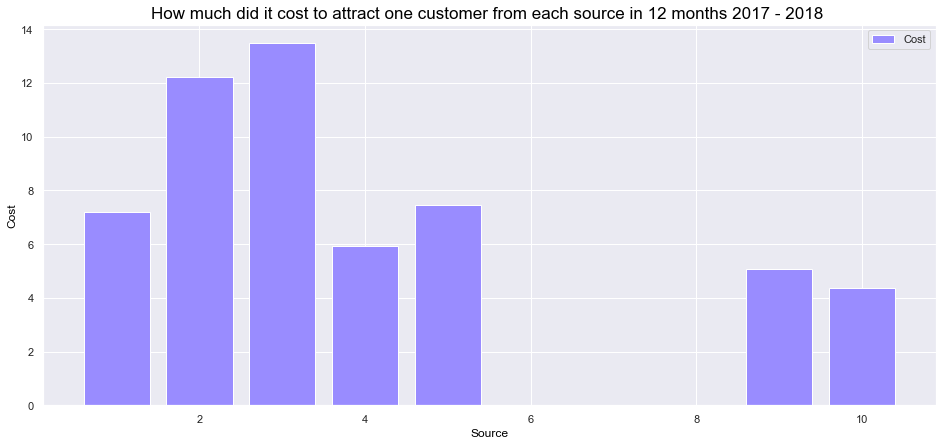

In [131]:
plt.figure(figsize=(16, 7))
plt.bar(cost_buyer_each_source['source_id'], cost_buyer_each_source['price_for_client'], color=(0.60, 0.55, 1))
plt.title('How much did it cost to attract one customer from each source in 12 months 2017 - 2018 ', fontsize=17, color='black')
plt.xlabel('Source',fontsize=12, color='black')
plt.ylabel('Cost',fontsize=12, color='black')
plt.legend([ 'Cost']);

## How much did it pay for itself? (ROI)


### Counting

**- LTV (from Eng. lifetime value) - a customer's "lifetime" value. This is the total amount of money one customer brings in on average from all their purchases**

**- CAC (from English. customer acquisition cost) - customer acquisition cost. Amount of money a new customer costs the company**

**- ROMI - this characteristic shows effectiveness of the advertising campaign and return on the advertising investments In our case everything greater than 1 has paid off**

**Let's build summary tables of marketing expenditures for each source and break them down by months**

In [132]:
sources = visit.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first'}).reset_index()
display(sources.head())
#соединяем первые покупки и источники 
payers = order.groupby('uid').agg({'buy_ts': 'min'}).merge(sources, on = 'uid').reset_index()
display(payers.head())
payers = payers.rename(columns = {'buy_ts': 'first_buy'})

#считаем временные промежутки между первыми покупками
ltv = payers.merge(order, on = 'uid')
ltv['lifetime'] = ((ltv['buy_ts'] - ltv['first_buy']) / np.timedelta64(1,'M')).round().astype(int)

#display(ltv.head(2))

#orders_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'count').fillna(0)
#buyers_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'uid', aggfunc = 'nunique').fillna(0)
#ltv = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'sum').fillna(0)
display(ltv.head())


,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


,index,uid,buy_ts,source_id
0,0,313578113262317,2018-01-03 21:51:00,2
1,1,1575281904278712,2017-06-03 10:13:00,10
2,2,2429014661409475,2017-10-11 18:33:00,3
3,3,2464366381792757,2018-01-28 15:54:00,5
4,4,2551852515556206,2017-11-24 10:14:00,5


,index,uid,first_buy,source_id,buy_ts,revenue,order_month,lifetime
0,0,313578113262317,2018-01-03 21:51:00,2,2018-01-03 21:51:00,0.55,2018-01-01,0
1,1,1575281904278712,2017-06-03 10:13:00,10,2017-06-03 10:13:00,1.22,2017-06-01,0
2,1,1575281904278712,2017-06-03 10:13:00,10,2017-06-03 17:39:00,1.83,2017-06-01,0
3,2,2429014661409475,2017-10-11 18:33:00,3,2017-10-11 18:33:00,73.33,2017-10-01,0
4,3,2464366381792757,2018-01-28 15:54:00,5,2018-01-28 15:54:00,2.44,2018-01-01,0


**Let's build a summary table with the amount of income from a particular source `source_id` for the time period `lifetime` - the period when the customer made the first purchase**	

In [133]:
report_ltv = ltv.groupby(['lifetime','source_id']).agg({'uid':'nunique', 'revenue': 'sum' }).reset_index()
report_ltv.columns = ['lifetime', 'source_id', 'n_buyers', 'revenue']
display(report_ltv.head())

,lifetime,source_id,n_buyers,revenue
0,0,1,2899,17846.78
1,0,2,3506,23737.70
2,0,3,10473,46894.89
3,0,4,10296,47204.71
4,0,5,6931,34030.40


**Let's count the customers that came from each source for all time**

In [134]:
report_ltv_n_buyers = report_ltv.groupby('source_id').agg({'n_buyers':'sum'}).reset_index()
report_ltv_n_buyers.columns = ['source_id', 'n_buyers_sum']
display(report_ltv_n_buyers.head(10))

,source_id,n_buyers_sum
0,1,3402
1,2,4228
2,3,11568
3,4,11308
4,5,7587
5,7,1
6,9,1375
7,10,1411


**Let's add a column with total income `gp` by default we have 100%**

In [135]:
margin_rate = 1
report_ltv['gp'] = report_ltv ['revenue'] * margin_rate
display(report_ltv.head(22))

,lifetime,source_id,n_buyers,revenue,gp
0,0,1,2899,17846.78,17846.78
1,0,2,3506,23737.70,23737.70
2,0,3,10473,46894.89,46894.89
3,0,4,10296,47204.71,47204.71
4,0,5,6931,34030.40,34030.40
5,0,7,1,1.22,1.22
6,0,9,1088,4222.42,4222.42
7,0,10,1329,4205.13,4205.13
8,1,1,110,2883.49,2883.49
9,1,2,159,4502.22,4502.22


**Create a table with the total number of buyers from each source for the whole period**


In [136]:
report_ltv = pd.merge(report_ltv, report_ltv_n_buyers, on='source_id')
report_ltv = report_ltv[report_ltv['lifetime'] <= 9 ]
display(report_ltv.head(22))

,lifetime,source_id,n_buyers,revenue,gp,n_buyers_sum
0,0,1,2899,17846.78,17846.78,3402
1,1,1,110,2883.49,2883.49,3402
2,2,1,92,2146.19,2146.19,3402
3,3,1,59,1874.49,1874.49,3402
4,4,1,57,1425.00,1425.00,3402
5,5,1,39,642.94,642.94,3402
6,6,1,45,796.48,796.48,3402
7,7,1,33,988.65,988.65,3402
8,8,1,23,940.43,940.43,3402
9,9,1,14,752.60,752.60,3402


**Let's add a column with LTV total amount of money one customer brings in on average from all his purchases from each source over a period of time**

In [137]:
report_ltv['ltv'] = report_ltv['gp'] / report_ltv['n_buyers_sum']


In [138]:
output_ltv = report_ltv.pivot_table(index = 'source_id', columns = 'lifetime', values='ltv', aggfunc='mean')
output_ltv = output_ltv.cumsum(axis=1).round(2)

display(output_ltv)

lifetime,0,1,2,3,4,5,6,7,8,9
source_id,,,,,,,,,,
1,5.25,6.09,6.72,7.28,7.69,7.88,8.12,8.41,8.68,8.91
2,5.61,6.68,8.06,9.33,9.87,10.35,10.55,10.74,10.92,10.97
3,4.05,4.28,4.41,4.53,4.60,4.64,4.66,4.68,4.70,4.71
4,4.17,4.31,4.42,4.51,4.61,4.76,4.86,4.91,4.93,4.96
5,4.49,4.67,5.00,6.25,6.46,6.62,6.73,6.81,6.87,6.92
7,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3.07,3.30,3.49,3.70,3.79,3.91,4.00,4.06,4.15,4.18
10,2.98,3.04,3.07,3.11,3.12,3.13,3.14,3.15,3.15,3.15


**Let us calculate the CAC of each source . First, find the total expenditure for each month and then divide it by the number of customers from each source**

Calculate CAC - grouping by sources and dividing by the same number of buyers from each source over the whole period.

**Grouping `costs` by source and amount of income received**

In [139]:
source_id_costs = cost.groupby('source_id').sum()
display(source_id_costs.head(9))

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


**Connecting the tables**

In [140]:
report_cac = pd.merge(report_ltv, source_id_costs, on=['source_id'])
report_cac['cac'] = report_cac['costs'] / report_cac['n_buyers_sum']
display(report_cac.head(20))
#display(report_new['costs'].sum())

,lifetime,source_id,n_buyers,revenue,gp,n_buyers_sum,ltv,costs,cac
0,0,1,2899,17846.78,17846.78,3402,5.245967,20833.27,6.123830
1,1,1,110,2883.49,2883.49,3402,0.847587,20833.27,6.123830
2,2,1,92,2146.19,2146.19,3402,0.630861,20833.27,6.123830
3,3,1,59,1874.49,1874.49,3402,0.550996,20833.27,6.123830
4,4,1,57,1425.00,1425.00,3402,0.418871,20833.27,6.123830
5,5,1,39,642.94,642.94,3402,0.188989,20833.27,6.123830
6,6,1,45,796.48,796.48,3402,0.234121,20833.27,6.123830
7,7,1,33,988.65,988.65,3402,0.290608,20833.27,6.123830
8,8,1,23,940.43,940.43,3402,0.276434,20833.27,6.123830
9,9,1,14,752.60,752.60,3402,0.221223,20833.27,6.123830


In [141]:
output_cac = report_cac.pivot_table(index = 'source_id', columns = 'lifetime', values='cac', aggfunc='mean')


To calculate cumulative ROMI, let's call the cumsum() method. cumulative sum). 
It sequentially adds up the elements of the set. For example, pd.Series([1, 2, 3]).cumsum() will return a series of 3 elements: 1, 3 и 6.
Each value is equal to the sum of the previous ones: 1, 3 = 1+2, 6 = 1+2+3.
`output_cac = output_cac.cumsum(axis=1).round(2) `


In [142]:
output_cac = output_cac.cumsum(axis=1).round(2) 
display(output_cac)

lifetime,0,1,2,3,4,5,6,7,8,9
source_id,,,,,,,,,,
1,6.12,12.25,18.37,24.50,30.62,36.74,42.87,48.99,55.11,61.24
2,10.12,20.25,30.37,40.50,50.62,60.75,70.87,81.00,91.12,101.24
3,12.22,24.43,36.65,48.87,61.08,73.30,85.52,97.73,109.95,122.17
4,5.40,10.80,16.20,21.60,27.00,32.41,37.81,43.21,48.61,54.01
5,6.82,13.64,20.47,27.29,34.11,40.93,47.75,54.57,61.40,68.22
9,4.01,8.03,12.04,16.05,20.06,24.08,28.09,32.10,36.11,40.13
10,4.13,8.25,12.38,16.51,20.63,24.76,28.89,33.01,37.14,41.26


**Let's calculate `ROMI` when advertising campaigns pay off**

In [143]:
report_cac['romi'] = report_cac['ltv'] / report_cac['cac']
display(report_cac.head())

,lifetime,source_id,n_buyers,revenue,gp,n_buyers_sum,ltv,costs,cac,romi
0,0,1,2899,17846.78,17846.78,3402,5.245967,20833.27,6.12383,0.856648
1,1,1,110,2883.49,2883.49,3402,0.847587,20833.27,6.12383,0.138408
2,2,1,92,2146.19,2146.19,3402,0.630861,20833.27,6.12383,0.103017
3,3,1,59,1874.49,1874.49,3402,0.550996,20833.27,6.12383,0.089976
4,4,1,57,1425.00,1425.00,3402,0.418871,20833.27,6.12383,0.068400


In [144]:
output_romi = report_cac.pivot_table(index = 'source_id', columns = 'lifetime', values='romi', aggfunc='mean')
output_romi = output_romi.cumsum(axis=1).round(2) 
display(output_romi)

lifetime,0,1,2,3,4,5,6,7,8,9
source_id,,,,,,,,,,
1,0.86,1.00,1.10,1.19,1.26,1.29,1.33,1.37,1.42,1.45
2,0.55,0.66,0.80,0.92,0.97,1.02,1.04,1.06,1.08,1.08
3,0.33,0.35,0.36,0.37,0.38,0.38,0.38,0.38,0.38,0.39
4,0.77,0.80,0.82,0.83,0.85,0.88,0.90,0.91,0.91,0.92
5,0.66,0.68,0.73,0.92,0.95,0.97,0.99,1.00,1.01,1.01
9,0.77,0.82,0.87,0.92,0.94,0.97,1.00,1.01,1.03,1.04
10,0.72,0.74,0.74,0.75,0.76,0.76,0.76,0.76,0.76,0.76


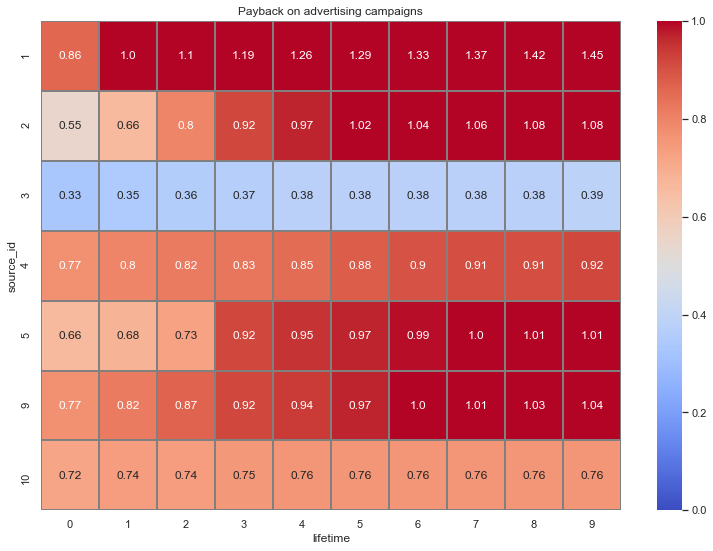

In [145]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Payback on advertising campaigns')
sns.heatmap(output_romi, annot=True, fmt='.3', linewidths=1, linecolor='gray', vmin = 0, vmax = 1, 
            cmap = 'coolwarm');

<div class="alert alert-info">
    
### Let's find out how quickly the average company pays for itself.   
</div>

In [146]:
output_romi.cumsum(axis=1).mean(axis=0) 

lifetime
0    0.665714
1    1.387143
2    2.161429
3    3.004286
4    3.877143
5    4.772857
6    5.687143
7    6.614286
8    7.555714
9    8.505714
dtype: float64

In [147]:
output_romi.mean(axis=0)

lifetime
0    0.665714
1    0.721429
2    0.774286
3    0.842857
4    0.872857
5    0.895714
6    0.914286
7    0.927143
8    0.941429
9    0.950000
dtype: float64

# Conclusion: On average the company is close with 6-7 months to payback, but due to the most problematic on the payback 3 and 10 advertising companies, on average does not pay off.

# Let's graph how these metrics differ by device and by advertising source? How do they change over time?

### Let's see the payback on different devices

In [148]:
display(visit.head(2))

,device,end_ts,source_id,start_ts,uid,day,week,month,year,duration,duration_min_int,first_activity_date,activity_month,first_activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,12,2017,0 days 00:18:00,18,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2,2018,0 days 00:28:00,28,2018-02-19 16:53:00,2018-02-01,2018-02-01,0


### Let's sort the table by what devices were used to access the poster

In [149]:
visit_device_touch = visit[visit['device'] == 'touch']
display(visit_device_touch.head(2))
visit_device_desktop = visit[visit['device'] == 'desktop']
display(visit_device_desktop.head(2))

,device,end_ts,source_id,start_ts,uid,day,week,month,year,duration,duration_min_int,first_activity_date,activity_month,first_activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,12,2017,0 days 00:18:00,18,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,26,7,2017,0 days 00:00:00,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0


,device,end_ts,source_id,start_ts,uid,day,week,month,year,duration,duration_min_int,first_activity_date,activity_month,first_activity_month,cohort_lifetime
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2,2018,0 days 00:28:00,28,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,5,2018,0 days 00:24:00,24,2018-03-09 20:05:00,2018-05-01,2018-03-01,2


### Let's start with the `touch devices`

In [150]:
sources = visit_device_touch.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first'}).reset_index()
#соединяем первые покупки и источники 
payers = order.groupby('uid').agg({'buy_ts': 'min'}).merge(sources, on = 'uid').reset_index()
payers = payers.rename(columns = {'buy_ts': 'first_buy'})
#считаем временные промежутки между первыми покупками
ltv = payers.merge(order, on = 'uid')
ltv['lifetime'] = ((ltv['buy_ts'] - ltv['first_buy']) / np.timedelta64(1,'M')).round().astype(int)


In [151]:
report_ltv = ltv.groupby(['lifetime','source_id']).agg({'uid':'nunique', 'revenue': 'sum' }).reset_index()
report_ltv.columns = ['lifetime', 'source_id', 'n_buyers', 'revenue']


In [152]:
report_ltv_n_buyers = report_ltv.groupby('source_id').agg({'n_buyers':'sum'}).reset_index()
report_ltv_n_buyers.columns = ['source_id', 'n_buyers_sum']


In [153]:
margin_rate = 1
report_ltv['gp'] = report_ltv ['revenue'] * margin_rate


In [154]:
report_ltv = pd.merge(report_ltv, report_ltv_n_buyers, on='source_id')


In [155]:
report_ltv['ltv'] = report_ltv['gp'] / report_ltv['n_buyers_sum']



In [156]:
source_id_costs = cost.groupby('source_id').sum()


In [157]:
report_cac = pd.merge(report_ltv, source_id_costs, on=['source_id'])
report_cac['cac'] = report_cac['costs'] / report_cac['n_buyers_sum']


In [158]:
report_cac['romi'] = report_cac['ltv'] / report_cac['cac']
display(report_cac.head())

,lifetime,source_id,n_buyers,revenue,gp,n_buyers_sum,ltv,costs,cac,romi
0,0,1,765,5211.01,5211.01,889,5.861654,20833.27,23.434499,0.250129
1,1,1,29,774.17,774.17,889,0.870832,20833.27,23.434499,0.037160
2,2,1,29,381.93,381.93,889,0.429618,20833.27,23.434499,0.018333
3,3,1,11,75.14,75.14,889,0.084522,20833.27,23.434499,0.003607
4,4,1,18,84.89,84.89,889,0.095489,20833.27,23.434499,0.004075


In [159]:
output_romi = report_cac.pivot_table(index = 'source_id', columns = 'lifetime', values='romi', aggfunc='mean')
output_romi = output_romi.cumsum(axis=1).round(2) 
display(output_romi)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,0.25,0.29,0.31,0.31,0.31,0.31,0.32,0.32,0.32,0.32,0.32,0.32,0.32
2,0.20,0.23,0.25,0.27,0.29,0.30,0.31,0.31,0.32,0.32,0.33,0.33,0.33
3,0.07,0.07,0.08,0.08,0.08,0.08,0.09,0.09,0.09,0.09,0.09,0.09,0.09
4,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.29,0.29,0.30,0.30,0.30,0.30
5,0.12,0.12,0.12,0.12,0.13,0.13,0.13,0.13,0.13,0.13,0.13,NaN,NaN
9,0.24,0.25,0.26,0.27,0.27,0.28,0.28,0.28,0.29,0.29,0.29,0.29,NaN
10,0.16,0.17,0.17,0.17,0.17,0.17,NaN,0.17,0.17,NaN,NaN,NaN,NaN


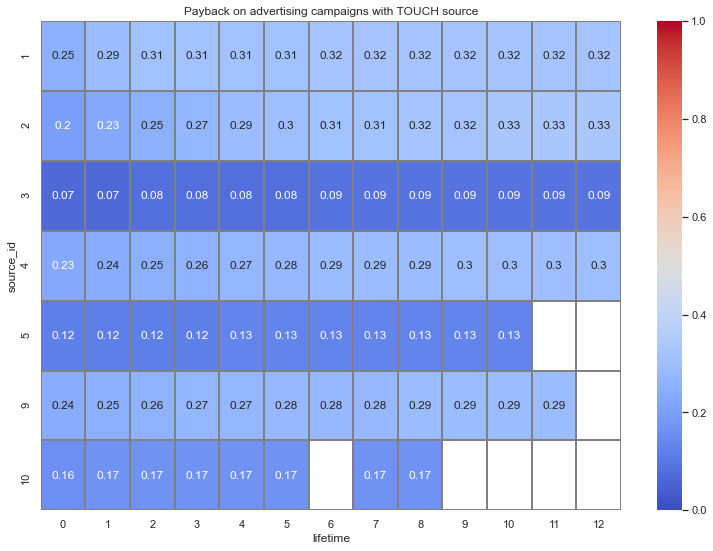

In [160]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Payback on advertising campaigns with TOUCH source')
sns.heatmap(output_romi, annot=True, fmt='.3', linewidths=1, linecolor='gray', vmin = 0, vmax = 1, 
            cmap = 'coolwarm');

# Вывод: companies that people come to from mobile devices don't pay off.

### Let's calculate the payback `desktop`

In [161]:
sources = visit_device_desktop.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first'}).reset_index()
#соединяем первые покупки и источники 
payers = order.groupby('uid').agg({'buy_ts': 'min'}).merge(sources, on = 'uid').reset_index()
payers = payers.rename(columns = {'buy_ts': 'first_buy'})
#считаем временные промежутки между первыми покупками
ltv = payers.merge(order, on = 'uid')
ltv['lifetime'] = ((ltv['buy_ts'] - ltv['first_buy']) / np.timedelta64(1,'M')).round().astype(int)

report_ltv = ltv.groupby(['lifetime','source_id']).agg({'uid':'nunique', 'revenue': 'sum' }).reset_index()
report_ltv.columns = ['lifetime', 'source_id', 'n_buyers', 'revenue']

report_ltv_n_buyers = report_ltv.groupby('source_id').agg({'n_buyers':'sum'}).reset_index()
report_ltv_n_buyers.columns = ['source_id', 'n_buyers_sum']

margin_rate = 1
report_ltv['gp'] = report_ltv ['revenue'] * margin_rate

report_ltv = pd.merge(report_ltv, report_ltv_n_buyers, on='source_id')
report_ltv['ltv'] = report_ltv['gp'] / report_ltv['n_buyers_sum']
source_id_costs = cost.groupby('source_id').sum()
report_cac = pd.merge(report_ltv, source_id_costs, on=['source_id'])
report_cac['cac'] = report_cac['costs'] / report_cac['n_buyers_sum']
report_cac['romi'] = report_cac['ltv'] / report_cac['cac']
output_romi = report_cac.pivot_table(index = 'source_id', columns = 'lifetime', values='romi', aggfunc='mean')
output_romi = output_romi.cumsum(axis=1).round(2) 
display(output_romi)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,0.70,0.81,0.91,1.00,1.07,1.10,1.14,1.19,1.23,1.27,1.28,1.30,1.31
2,0.49,0.60,0.75,0.87,0.93,0.99,1.01,1.03,1.05,1.05,1.06,1.07,1.07
3,0.30,0.31,0.32,0.33,0.34,0.34,0.34,0.35,0.35,0.35,0.35,0.35,0.35
4,0.62,0.64,0.65,0.67,0.69,0.70,0.72,0.72,0.73,0.73,0.74,0.74,0.74
5,0.58,0.60,0.65,0.83,0.86,0.88,0.90,0.91,0.92,0.93,0.93,0.93,0.93
9,0.67,0.73,0.78,0.83,0.85,0.88,0.90,0.92,0.94,0.95,0.95,NaN,NaN
10,0.60,0.61,0.62,0.63,0.63,0.63,0.64,0.64,0.64,0.64,NaN,NaN,NaN


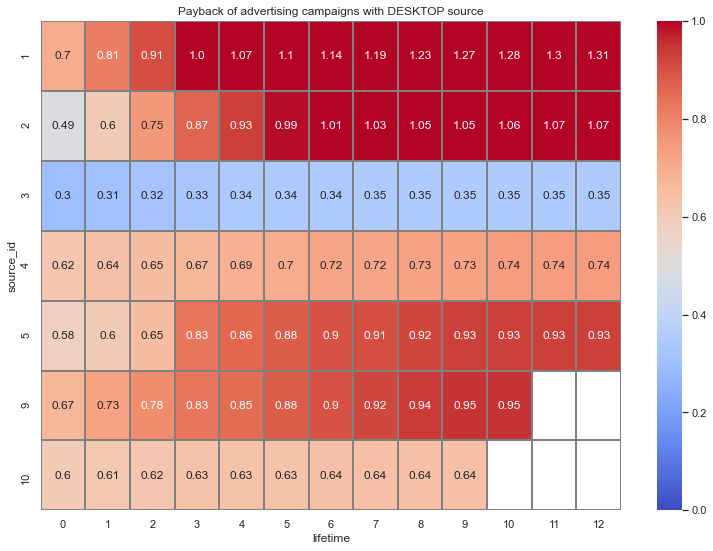

In [162]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Payback of advertising campaigns with DESKTOP source')
sns.heatmap(output_romi, annot=True, fmt='.3', linewidths=1, linecolor='gray', vmin = 0, vmax = 1, 
            cmap = 'coolwarm');

# Conclusion: The desktop version of the poster pays for itself much better than the mobile version; the investment in the first advertising campaign paid for itself in the second month. the most problematic in terms of return on investment are the 3 and 10 advertising companies.

# General conclusion: 
## - based on romi metrics, we see payback problems for 3 and 10 advertising campaigns
## - based on romi metrics, we can see the ROI problems of advertising campaigns that come from mobile devices.

# Advice to marketers:
## 1. Close or deeply rework campaigns 3 and 10 as unprofitable for the past year
## 2. Redesign the mobile app and pay attention to the site's display on mobile devices. Although mobile applications as a rule exceed desktop versions in terms of usage frequency, the opposite situation can be observed here.
